<a href="https://colab.research.google.com/github/harrislam1/covid19_NYC_taxi_trips/blob/EDA_Notebook/loading_NYC_taxi_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
#import glob
import moviepy.editor as mpy



Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2359296/45929032 bytes (5.1%)5619712/45929032 bytes (12.2%)8806400/45929032 bytes (19.2%)12140544/45929032 bytes (26.4%)15163392/45929032 bytes (33.0%)18022400/45929032 bytes (39.2%)20922368/45929032 bytes (45.6%)24133632/45929032 bytes (52.5%)27213824/45929032 bytes (59.3%)30343168/45929032 bytes (66.1%)33513472/45929032 bytes (73.0%)36708352/45929032 bytes (79.9%)

#Load Yellow Cab 2019 data(unloadable even with batch processing)

In [ ]:
yellow_2019url="https://nyc-tlc.s3.amazonaws.com/trip+data/yellow_tripdata_2019-" #yellow taxi data for 2019
#green_2019url="https://nyc-tlc.s3.amazonaws.com/trip+data/green_tripdata_2019-" #green taxi data for 2019
#fhv_2019url="https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2019-" #for hire vehicle data for 2019(Uber/Lyft)
months=["01","02","03","04","05","06","07","08","09","10","11","12"]
end=".csv"
df_yellow2019={}
#df_green2019={}
#df_fhv2019={}

for elem in range(len(months)):
  df_yellow2019[elem] = pd.read_csv(f"{yellow_2019url}{months[elem]}{end}", low_memory=False, chunksize=100)
  #df_yellow2019[elem]['pick_up_date'] = pd.to_datetime(df_yellow2019[elem].tpep_pickup_datetime)
  #df_yellow2019[elem]['year'] = df_yellow2019[elem].pick_up_date.dt.year
  #df_yellow2019[elem]['month'] = df_yellow2019[elem].pick_up_date.dt.month
  
  #df_green2019[elem]=pd.read_csv(f"{green_2019url}{months[elem]}{end})
  #df_fhv2019[elem]=pd.read_csv(f"{fhv_2019url}{months[elem]}{end}"")

KeyboardInterrupt: ignored

In [ ]:
df_yellow2019.size

AttributeError: ignored

In [ ]:
months_=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

yellow2019_clean={}
for i in range(len(df_yellow2019)):
  yellow2019_clean[i] = df_yellow2019[i].loc[(df_yellow2019[i].month==i+1) & (df_yellow2019[i].year==2019)]

In [ ]:
for i in range(len(yellow2019_clean)):
  yellow2019_clean[i].groupby(yellow2019_clean[i].pick_up_date.dt.date)['trip_distance'].count().plot(figsize=(18,8))
plt.title("Yellow Cabs Daily Number of Trips (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Trips", fontsize=14)
plt.show()

In [ ]:
total_distance=[]
for i in range(len(yellow2019_clean)):
  total_distance.append(yellow2019_clean[i]['trip_distance'].sum())

figure(figsize=(18, 6), dpi=80)
plt.plot(months_,total_distance, 'xr-')
plt.legend()
plt.title("Yellow Cabs Monthly Total Travelled Distance (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Miles", fontsize=14)
plt.show()

In [ ]:
for i in range(len(yellow2019_clean)):
  yellow2019_clean[i].groupby(yellow2019_clean[i].pick_up_date.dt.date)['trip_distance'].mean().plot(figsize=(18,8))
plt.title("Yellow Cabs Daily Mean Trip Distance (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Miles", fontsize=14)
plt.show()

In [ ]:
total_fare=[]
for i in range(len(yellow2019_clean)):
  total_fare.append(yellow2019_clean[i]['total_amount'].sum())

figure(figsize=(18, 6), dpi=80)
plt.plot(months_,total_fare, 'xg-')
plt.legend()
plt.title("Yellow Cabs Monthly Total Revenue (NYC 2019)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD $", fontsize=14)
plt.show()

In [ ]:
total_tips=[]
for i in range(len(yellow2019_clean)):
  total_tips.append(yellow2019_clean[i]['tip_amount'].sum())

figure(figsize=(18, 6), dpi=80)
plt.plot(months_,total_tips, 'xy-')
plt.legend()
plt.title("Yellow Cabs Monthly Total Tips (NYC 2019)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD $", fontsize=14)
plt.show()

In [ ]:
total_tax=[]
for i in range(len(yellow2019_clean)):
  total_tax.append(yellow2019_clean[i]['mta_tax'].sum())

figure(figsize=(18, 6), dpi=80)
plt.plot(months_,total_tax, 'xr-')
plt.legend()
plt.title("Yellow Cabs Monthly Taxes Collected (NYC 2019)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD $", fontsize=14)
plt.show()

In [ ]:
total_toll=[]
for i in range(len(yellow2019_clean)):
  total_toll.append(yellow2019_clean[i]['tolls_amount'].sum())

figure(figsize=(18, 6), dpi=80)
plt.plot(months_,total_toll, 'xm-')
plt.legend()
plt.title("Yellow Cabs Monthly Tolls Fees (NYC 2019)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD $", fontsize=14)
plt.show()

In [ ]:
for i in range(len(yellow2019_clean)):
  yellow2019_clean[i].groupby(yellow2019_clean[i].pick_up_date.dt.date)['tip_amount'].mean().plot(figsize=(18,8))
plt.title("Yellow Cabs Daily Mean Tip Amount (NYC 2019)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("$", fontsize=14)
plt.show()

In [ ]:
for i in range(len(yellow2019_clean)):
  figure(figsize=(8, 6), dpi=80)
  plt.hist(yellow2019_clean[i]['PULocationID'])
  plt.title(f"Yellow Cabs Pick-up Zone Code Histogram for {months_[i]} 2019", fontsize=14)
  plt.xlabel("Zone Code", fontsize=14)
  plt.ylabel("Counts", fontsize=14)
  plt.show()

In [ ]:
for i in range(len(yellow2019_clean)):
  figure(figsize=(8, 6), dpi=80)
  plt.hist(yellow2019_clean[i]['DOLocationID'])
  plt.title(f"Yellow Cabs Pick-up Zone Code Histogram for {months_[i]} 2019", fontsize=14)
  plt.xlabel("Zone Code", fontsize=14)
  plt.ylabel("Counts", fontsize=14)
  plt.show()

#Loading Yellow Cab 2020 Data

Since the data is stored separately for each month, 
we load them through a loop and save the entire year's
data as a dictionary of dataframes.

We do the iconic NYC yellow cab first.

In [2]:
yellow_2020url="https://nyc-tlc.s3.amazonaws.com/trip+data/yellow_tripdata_2020-" #yellow taxi data for 2020
#green_2020url="https://nyc-tlc.s3.amazonaws.com/trip+data/green_tripdata_2020-" #green taxi data for 2020
#fhv_2020url="https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2020-" #for hire vehicle data for 2020(Uber/Lyft)
months=["01","02","03","04","05","06","07","08","09","10","11","12"]
end=".csv"
df_yellow2020={}
#df_green2020={}
#df_fhv2020={}

for elem in range(len(months)):
  df_yellow2020[elem] = pd.read_csv(f"{yellow_2020url}{months[elem]}{end}", low_memory=False)
  df_yellow2020[elem]['pick_up_date'] = pd.to_datetime(df_yellow2020[elem].tpep_pickup_datetime)
  df_yellow2020[elem]['year'] = df_yellow2020[elem].pick_up_date.dt.year
  df_yellow2020[elem]['month'] = df_yellow2020[elem].pick_up_date.dt.month
  
  #df_green2020[elem]=pd.read_csv(f"{green_2020url}{months[elem]}{end})
  #df_fhv2020[elem]=pd.read_csv(f"{fhv_2020url}{months[elem]}{end}"")

In [ ]:
df_yellow2020[0].shape

(6405008, 29)

#Loading Taxi Codes 

In [18]:
taxi_zone=pd.read_csv("https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv")
taxi_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


Do this if interested in merging taxi cab trip dataframes with taxi code zones

In [ ]:
for elem in range(len(months)):
  df_yellow2020[elem]=pd.merge(df_yellow2020[elem],taxi_zone,left_on="PULocationID", right_on="LocationID")

In [ ]:
df_yellow2020[0].tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pick_up_date,year,month,PULocationID,PUBorough,PUZone,PUservice_zone,DOLocationID,DOBorough,DOZone,DOservice_zone
6405003,NaN,2020-01-07 15:13:00,2020-01-07 15:37:00,NaN,-11.53,NaN,NaN,76,2,NaN,36.00,2.75,0.5,0.0,2.29,0.3,41.84,0.0,2020-01-07 15:13:00,2020,1,76,Brooklyn,East New York,Boro Zone,2,Queens,Jamaica Bay,Boro Zone
6405004,NaN,2020-01-07 15:13:00,2020-01-07 15:37:00,NaN,-11.53,NaN,NaN,76,2,NaN,36.00,2.75,0.5,0.0,2.29,0.3,41.84,0.0,2020-01-07 15:13:00,2020,1,76,Brooklyn,East New York,Boro Zone,2,Queens,Jamaica Bay,Boro Zone
6405005,1.0,2020-01-25 15:31:46,2020-01-25 17:03:06,1.0,0.00,1.0,N,169,2,1.0,58.20,0.00,0.5,0.0,8.41,0.3,67.41,0.0,2020-01-25 15:31:46,2020,1,169,Bronx,Mount Hope,Boro Zone,2,Queens,Jamaica Bay,Boro Zone
6405006,NaN,2020-01-05 15:57:02,2020-01-05 16:17:52,NaN,9.60,NaN,NaN,215,2,NaN,43.86,2.75,0.0,0.0,2.29,0.3,49.20,0.0,2020-01-05 15:57:02,2020,1,215,Queens,South Jamaica,Boro Zone,2,Queens,Jamaica Bay,Boro Zone
6405007,1.0,2020-01-21 06:34:06,2020-01-21 07:16:05,1.0,0.00,1.0,N,197,2,1.0,30.20,0.00,0.5,0.0,4.58,0.3,35.58,0.0,2020-01-21 06:34:06,2020,1,197,Queens,Richmond Hill,Boro Zone,2,Queens,Jamaica Bay,Boro Zone


In [ ]:
for elem in range(len(months)):
  df_yellow2020[elem].rename({'LocationID': 'PULocationID', 'Borough': 'PUBorough','Zone':'PUZone','service_zone':'PUservice_zone'}, axis=1, inplace=True)

In [ ]:
for elem in range(len(months)):
  df_yellow2020[elem]=pd.merge(df_yellow2020[elem],taxi_zone,left_on="DOLocationID", right_on="LocationID")

In [ ]:
for elem in range(len(months)):
  df_yellow2020[elem].rename({'LocationID': 'DOLocationID', 'Borough': 'DOBorough','Zone':'DOZone','service_zone':'DOservice_zone'}, axis=1, inplace=True)

In [ ]:
for elem in range(len(months)):
  df_yellow2020[elem].drop(['PULocationID', 'DOLocationID','RatecodeID','store_and_fwd_flag','payment_type','PUservice_zone','DOservice_zone','VendorID'], axis=1, inplace=True)

In [ ]:
df_yellow2020[0].tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pick_up_date,year,month,PUBorough,PUZone,DOBorough,DOZone
6405003,2020-01-07 15:13:00,2020-01-07 15:37:00,NaN,-11.53,36.00,2.75,0.5,0.0,2.29,0.3,41.84,0.0,2020-01-07 15:13:00,2020,1,Brooklyn,East New York,Queens,Jamaica Bay
6405004,2020-01-07 15:13:00,2020-01-07 15:37:00,NaN,-11.53,36.00,2.75,0.5,0.0,2.29,0.3,41.84,0.0,2020-01-07 15:13:00,2020,1,Brooklyn,East New York,Queens,Jamaica Bay
6405005,2020-01-25 15:31:46,2020-01-25 17:03:06,1.0,0.00,58.20,0.00,0.5,0.0,8.41,0.3,67.41,0.0,2020-01-25 15:31:46,2020,1,Bronx,Mount Hope,Queens,Jamaica Bay
6405006,2020-01-05 15:57:02,2020-01-05 16:17:52,NaN,9.60,43.86,2.75,0.0,0.0,2.29,0.3,49.20,0.0,2020-01-05 15:57:02,2020,1,Queens,South Jamaica,Queens,Jamaica Bay
6405007,2020-01-21 06:34:06,2020-01-21 07:16:05,1.0,0.00,30.20,0.00,0.5,0.0,4.58,0.3,35.58,0.0,2020-01-21 06:34:06,2020,1,Queens,Richmond Hill,Queens,Jamaica Bay


In [ ]:
df_yellow2020[0].shape

(6405008, 19)

#Extracting correct dates 

Each month happens to have some bad dates,
so we loop through the entire dictionary of dataframes to extract only the proper dates for each month.

In [3]:
yellow2020_clean={}
for i in range(len(df_yellow2020)):
  yellow2020_clean[i] = df_yellow2020[i].loc[(df_yellow2020[i].month==i+1) & (df_yellow2020[i].year==2020)]

In [ ]:
#check cleaned dictionary 
df_yellow2020[10].loc[(df_yellow2020[10].month==11) & (df_yellow2020[10].year==2020)].shape

(1508873, 19)

In [ ]:
yellow2020_clean[10].shape

(1508873, 19)

In [ ]:
df_yellow2020[0].shape

(6405008, 21)

In [ ]:
yellow2020_clean[0].shape

(6404796, 21)

In [ ]:
#bad date entries for January
df_yellow2020[0].shape[0]-yellow2020_clean[0].shape[0]

212

#Preliminary Plots

In [4]:
months_=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]


Text(0, 0.5, 'Total Trips')

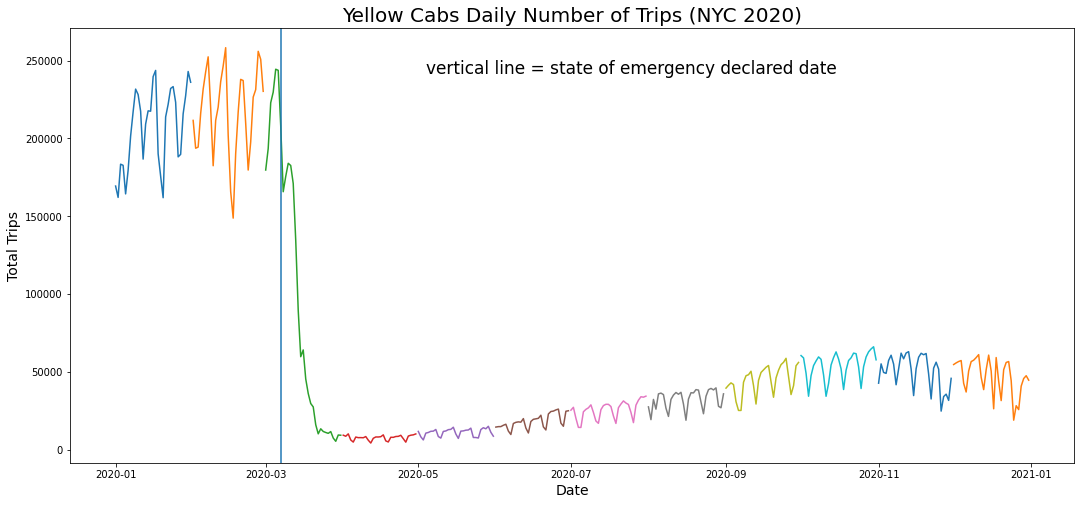

In [ ]:
plt.figure(figsize=(18,8))
for i in range(len(yellow2020_clean)):
  sns.lineplot(data=yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['trip_distance'].count())
plt.axvline(pd.to_datetime('2020-03-07'))
plt.figtext(0.4, .8, "vertical line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Number of Trips (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Trips", fontsize=14)



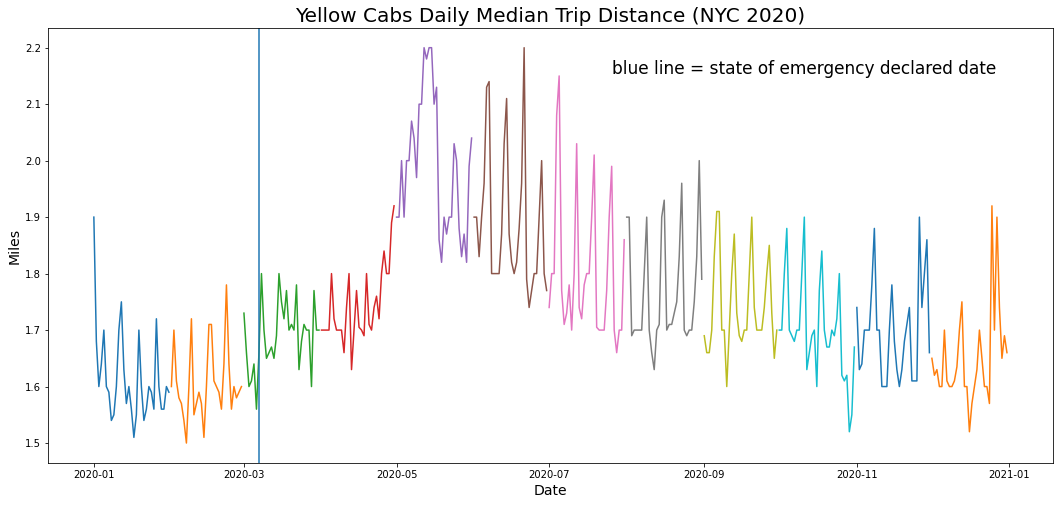

In [ ]:
plt.figure(figsize=(18,8))
for i in range(len(yellow2020_clean)):
  sns.lineplot(data=yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['trip_distance'].median())
plt.axvline(pd.to_datetime('2020-03-07'))
plt.figtext(0.56, .8, "blue line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Median Trip Distance (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Miles", fontsize=14)
plt.show()

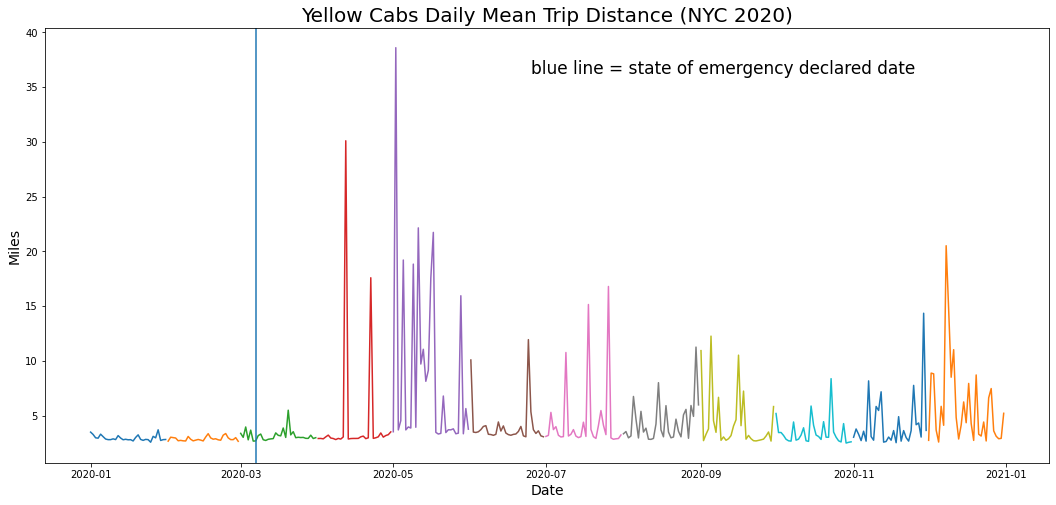

In [ ]:
plt.figure(figsize=(18,8))
for i in range(len(yellow2020_clean)):
  sns.lineplot(data=yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['trip_distance'].mean())
plt.axvline(pd.to_datetime('2020-03-07'))
plt.figtext(0.5, .8, "blue line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Mean Trip Distance (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Miles", fontsize=14)
plt.show()

No handles with labels found to put in legend.


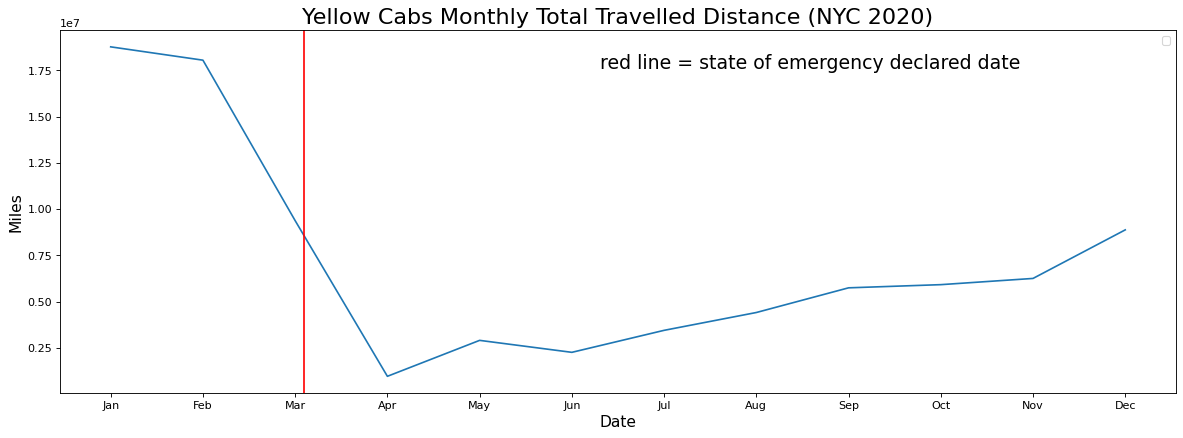

In [ ]:
total_distance=[]
for i in range(len(yellow2020_clean)):
  total_distance.append(yellow2020_clean[i]['trip_distance'].sum())

figure(figsize=(18, 6), dpi=80)
sns.lineplot(x=months_,y=total_distance, markers=True)
plt.axvline(2.1, color='r')
plt.figtext(0.5, .8, "red line = state of emergency declared date", fontsize=17)
plt.legend()
plt.title("Yellow Cabs Monthly Total Travelled Distance (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Miles", fontsize=14)
plt.show()

No handles with labels found to put in legend.


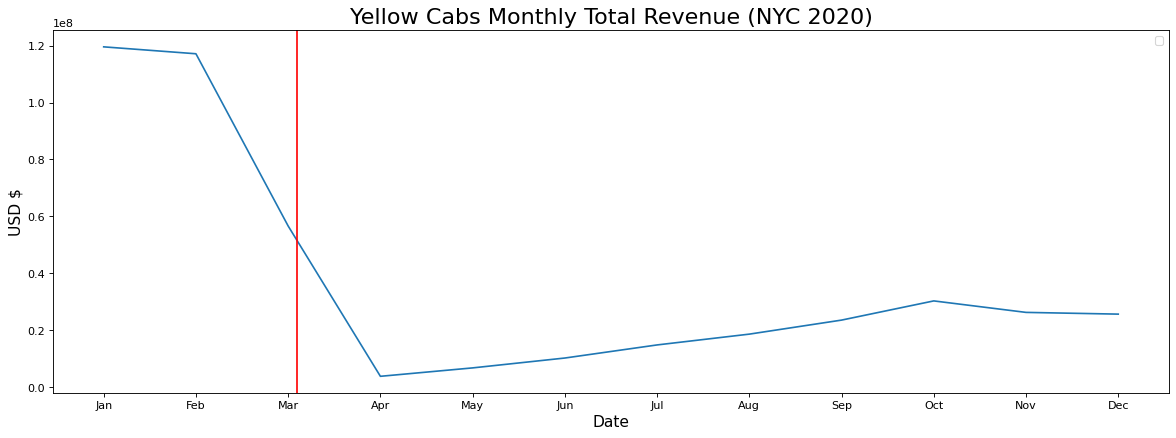

In [ ]:
total_fare=[]
for i in range(len(yellow2020_clean)):
  total_fare.append(yellow2020_clean[i]['total_amount'].sum())

figure(figsize=(18, 6), dpi=80)
sns.lineplot(x=months_,y=total_fare)
plt.axvline(2.1, color='r')
#plt.figtext(0.5, .8, "blue line = state of emergency declared date", fontsize=17)
plt.legend()
plt.title("Yellow Cabs Monthly Total Revenue (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD $", fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


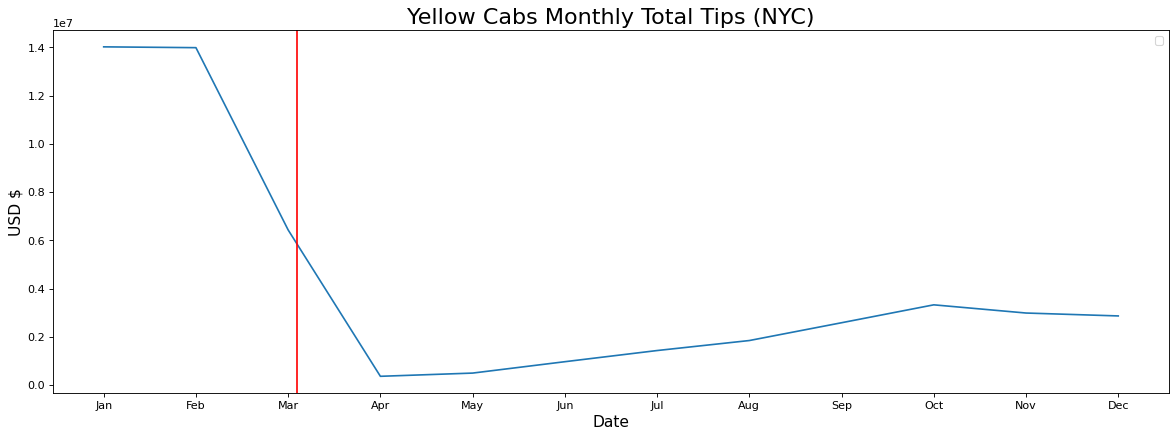

In [ ]:
total_tips=[]
for i in range(len(yellow2020_clean)):
  total_tips.append(yellow2020_clean[i]['tip_amount'].sum())

figure(figsize=(18, 6), dpi=80)
sns.lineplot(months_,total_tips)
plt.axvline(2.1, color='r')
#plt.figtext(0.5, .8, "blue line = state of emergency declared date", fontsize=17)
plt.legend()
plt.title("Yellow Cabs Monthly Total Tips (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD $", fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


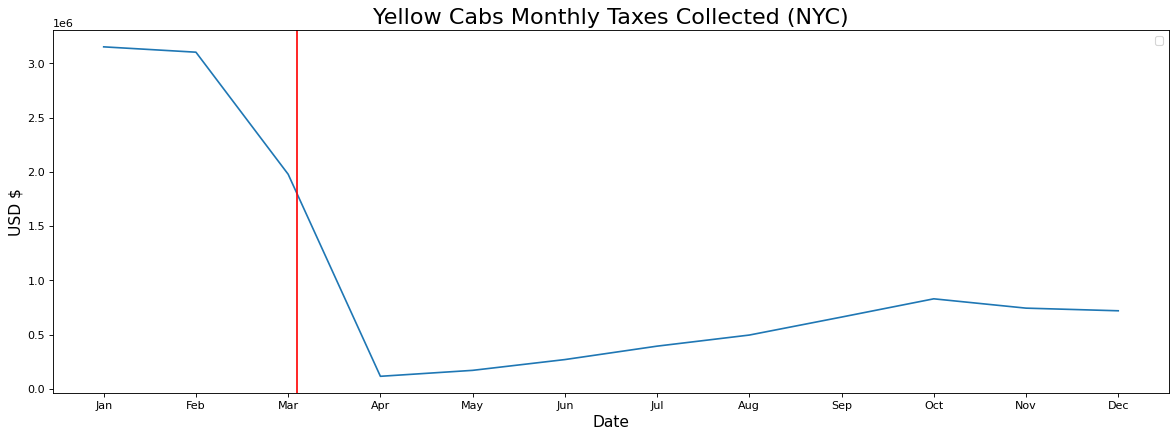

In [ ]:
total_tax=[]
for i in range(len(yellow2020_clean)):
  total_tax.append(yellow2020_clean[i]['mta_tax'].sum())

figure(figsize=(18, 6), dpi=80)
sns.lineplot(months_,total_tax)
plt.axvline(2.1, color='r')
#plt.figtext(0.5, .8, "blue line = state of emergency declared date", fontsize=17)
plt.legend()
plt.title("Yellow Cabs Monthly Taxes Collected (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD $", fontsize=14)
plt.show()

##Location Zone Histogram Gif

These zone codes help interpret the histograms that are below them.

In [33]:
taxi_zone.iloc[150:190]

,LocationID,Borough,Zone,service_zone
150,151,Manhattan,Manhattan Valley,Yellow Zone
151,152,Manhattan,Manhattanville,Boro Zone
152,153,Manhattan,Marble Hill,Boro Zone
153,154,Brooklyn,Marine Park/Floyd Bennett Field,Boro Zone
154,155,Brooklyn,Marine Park/Mill Basin,Boro Zone
155,156,Staten Island,Mariners Harbor,Boro Zone
156,157,Queens,Maspeth,Boro Zone
157,158,Manhattan,Meatpacking/West Village West,Yellow Zone
158,159,Bronx,Melrose South,Boro Zone
159,160,Queens,Middle Village,Boro Zone


In [31]:
taxi_zone.iloc[220:250]

,LocationID,Borough,Zone,service_zone
220,221,Staten Island,Stapleton,Boro Zone
221,222,Brooklyn,Starrett City,Boro Zone
222,223,Queens,Steinway,Boro Zone
223,224,Manhattan,Stuy Town/Peter Cooper Village,Yellow Zone
224,225,Brooklyn,Stuyvesant Heights,Boro Zone
225,226,Queens,Sunnyside,Boro Zone
226,227,Brooklyn,Sunset Park East,Boro Zone
227,228,Brooklyn,Sunset Park West,Boro Zone
228,229,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone
229,230,Manhattan,Times Sq/Theatre District,Yellow Zone


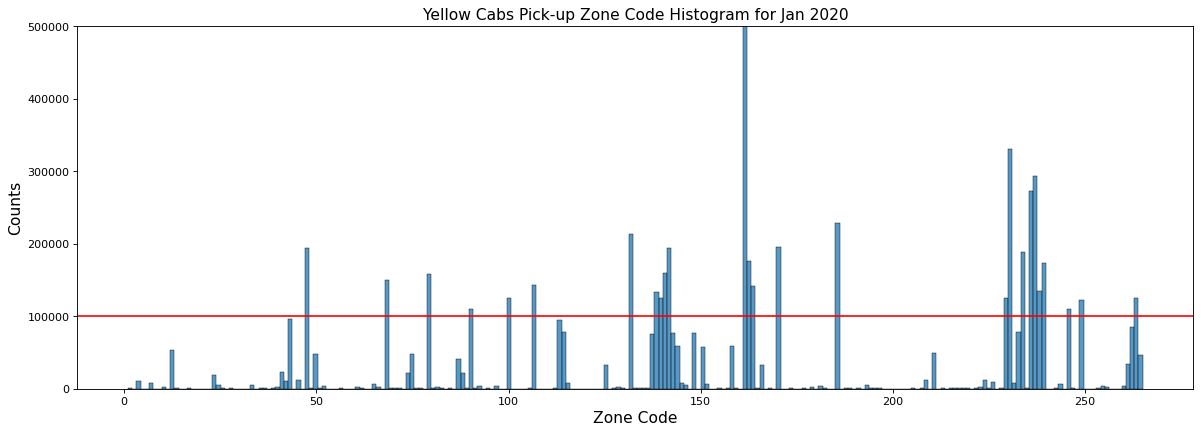

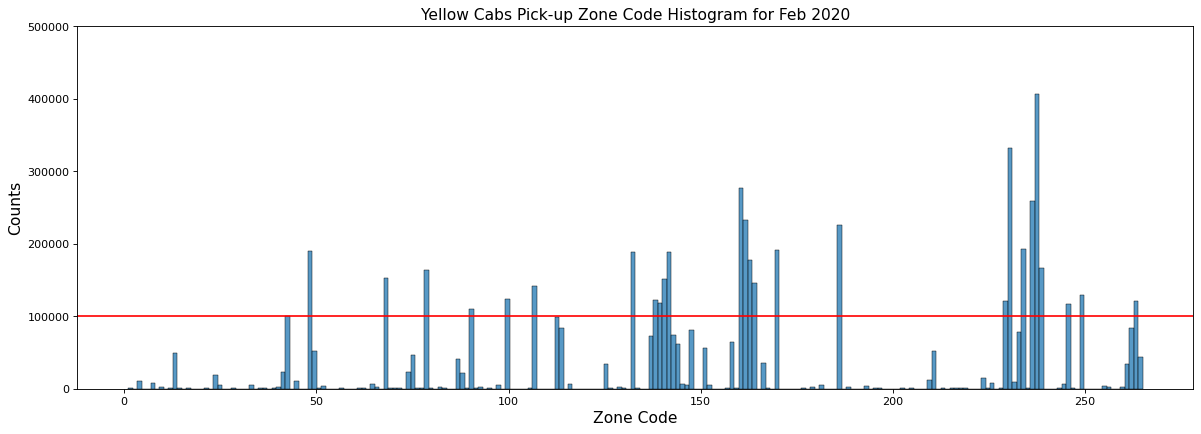

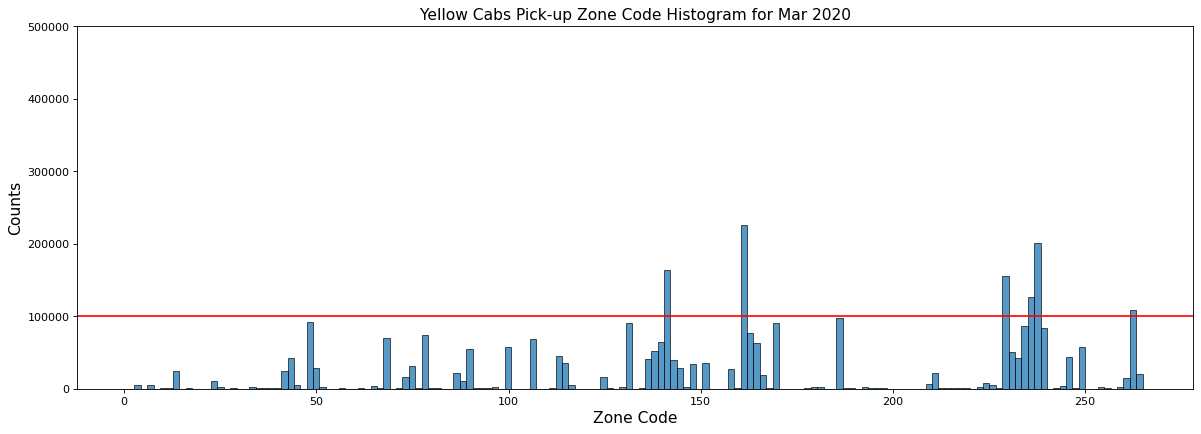

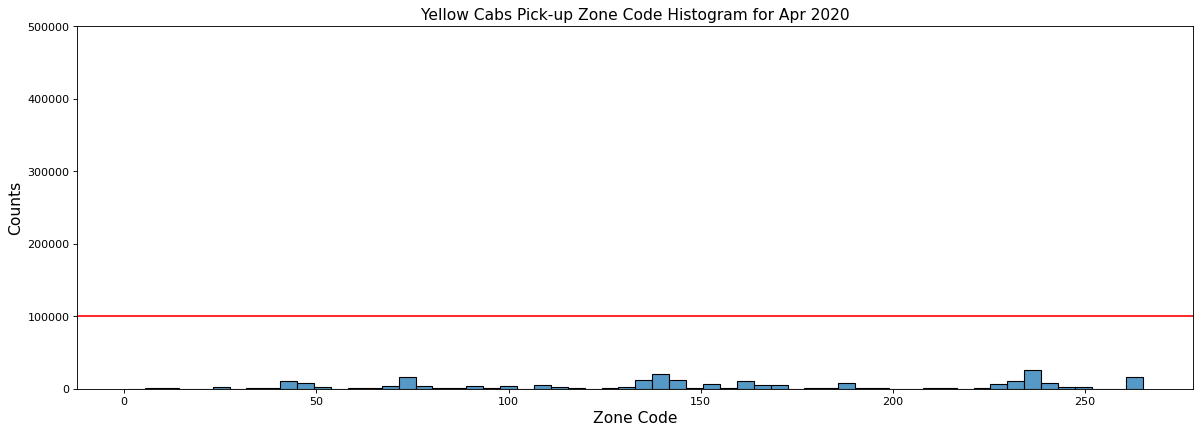

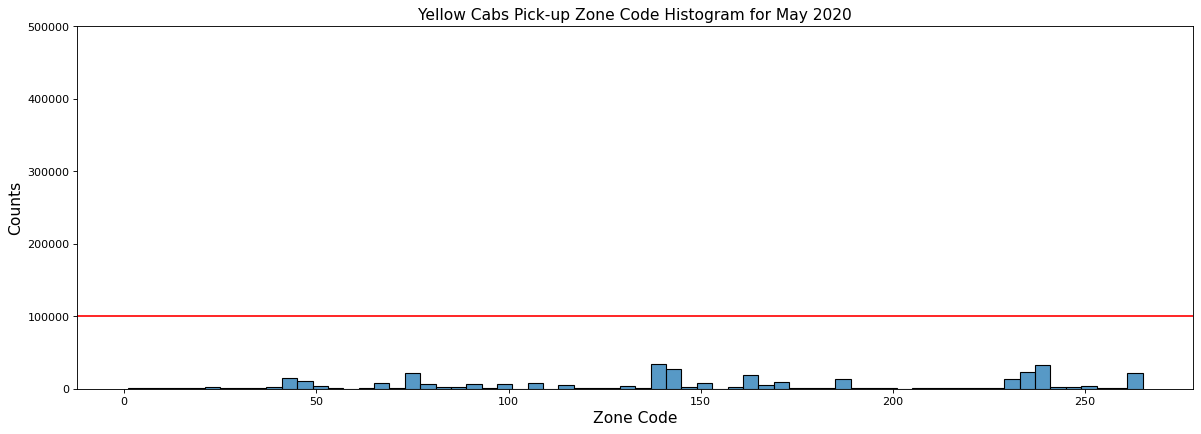

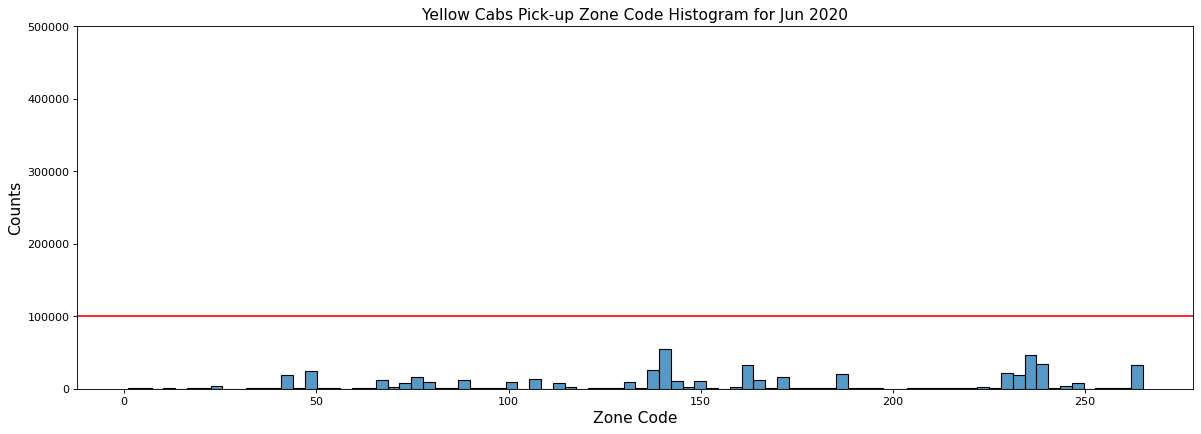

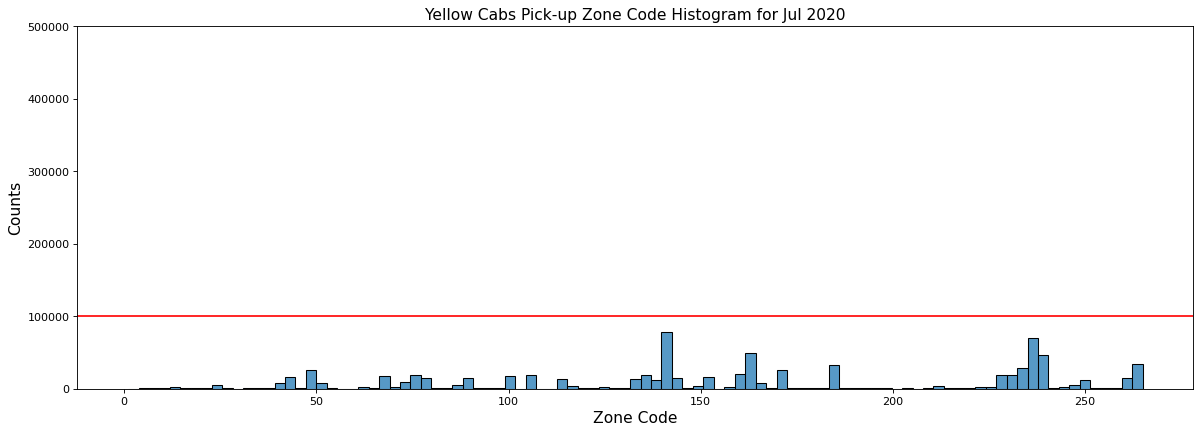

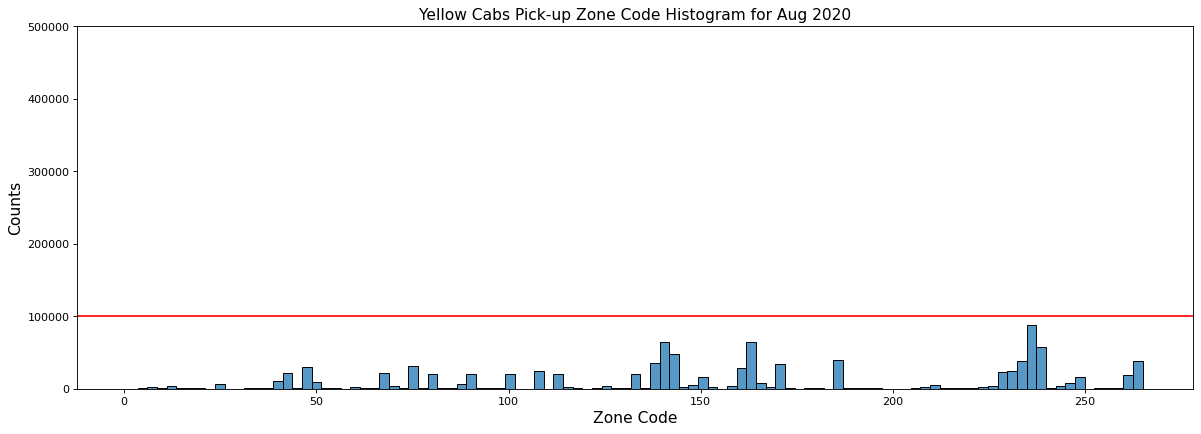

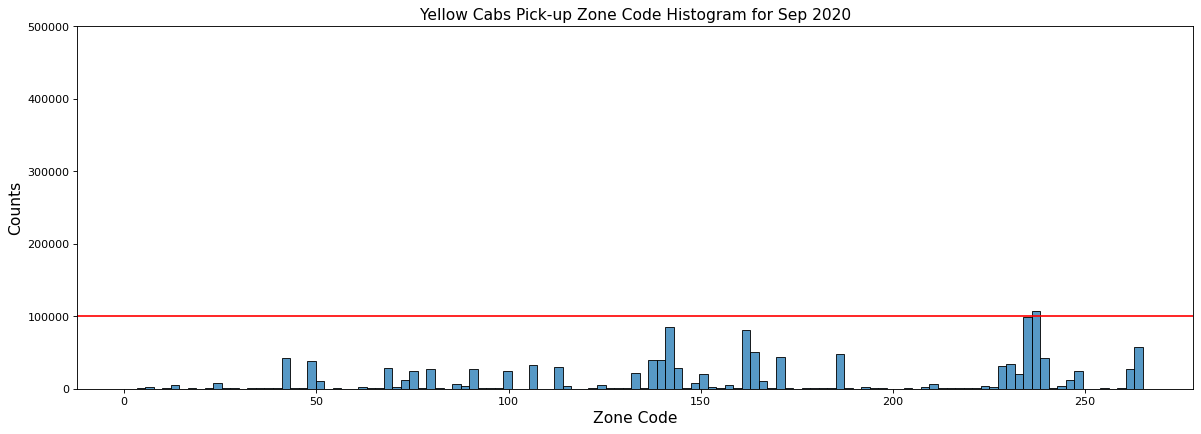

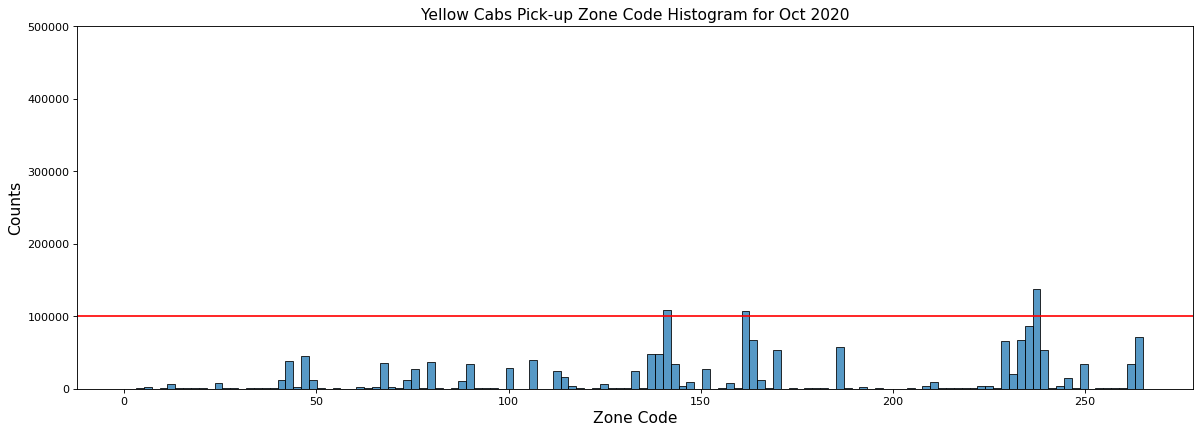

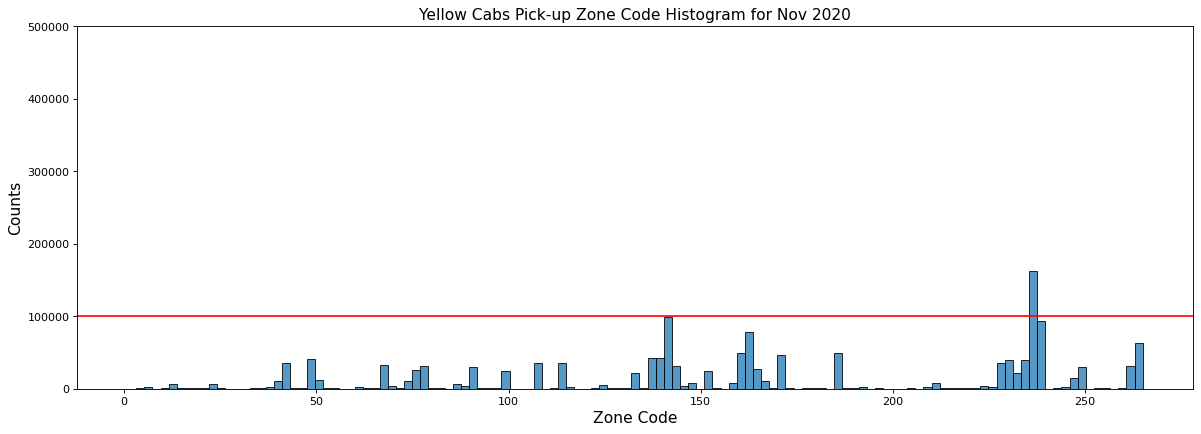

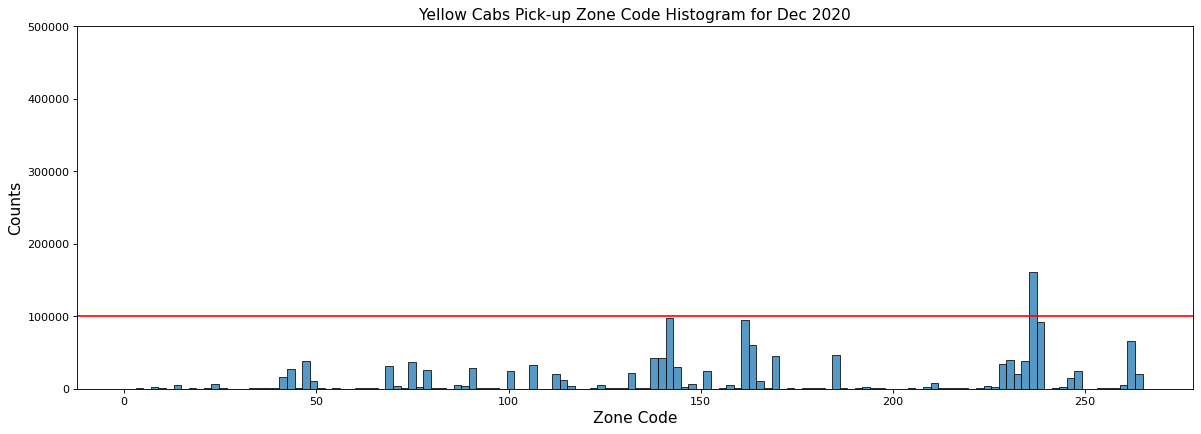

In [14]:
#pickup_location zone
for i in range(len(yellow2020_clean)):
  figure(figsize=(18, 6), dpi=80)
  ax=sns.histplot(data=yellow2020_clean[i]['PULocationID'])
  plt.title(f"Yellow Cabs Pick-up Zone Code Histogram for {months_[i]} 2020", fontsize=14)
  plt.xlabel("Zone Code", fontsize=14)
  plt.ylabel("Counts", fontsize=14)
  ax.set_ylim(0, 500000)
  plt.axhline(y=100000, color='r', linestyle='-')
  fig = ax.get_figure()
  fig.savefig(f"/content/imgs/{i}.png")
  plt.show()

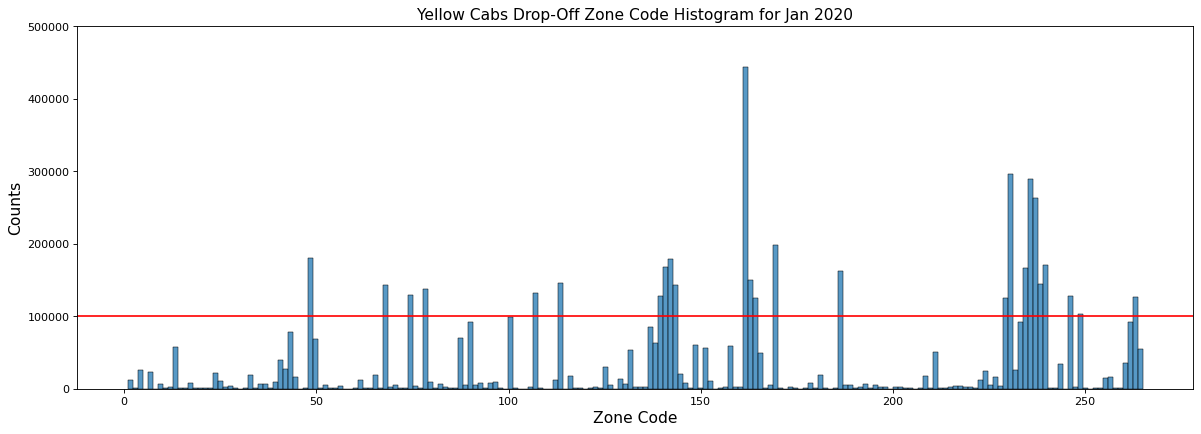

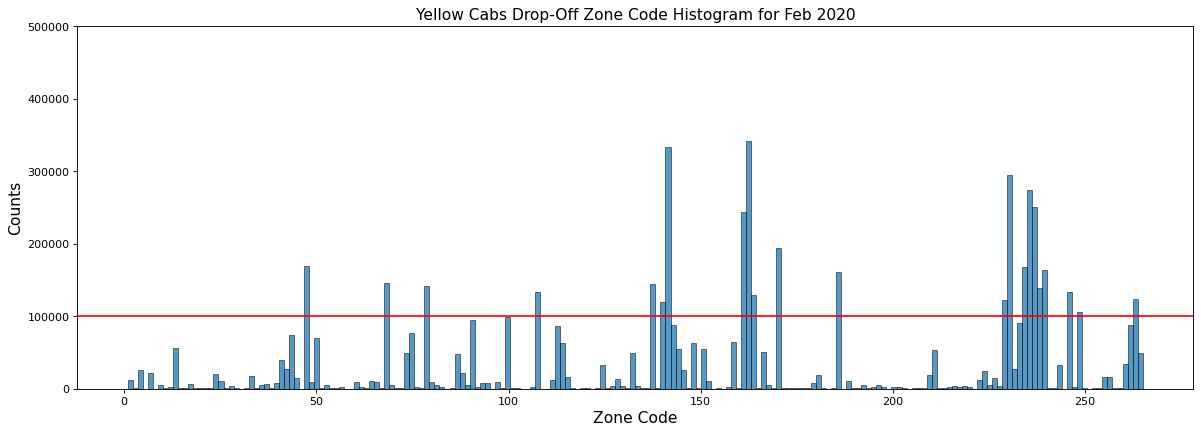

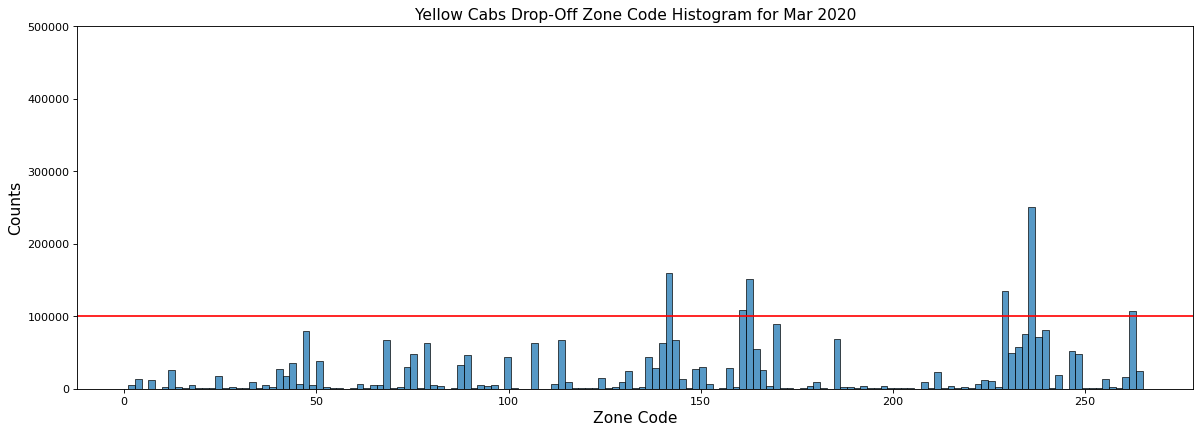

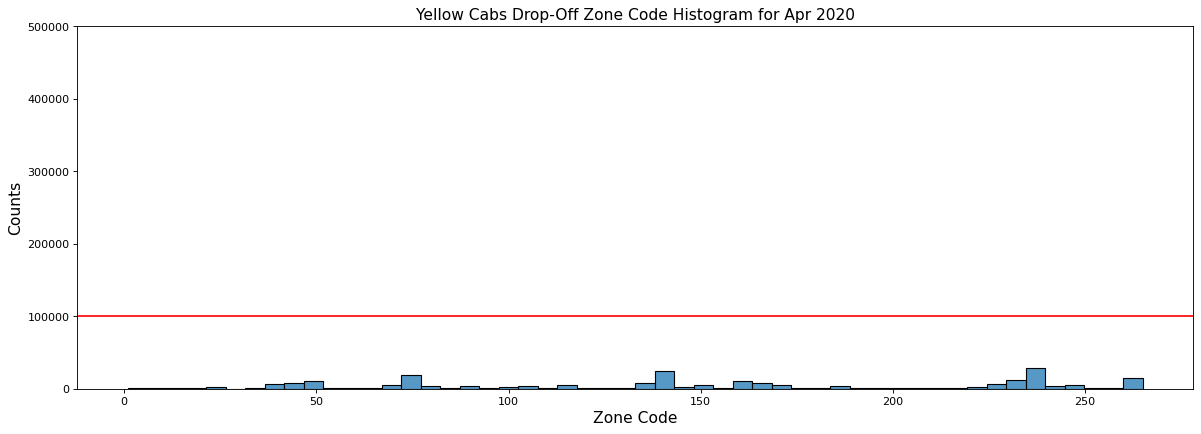

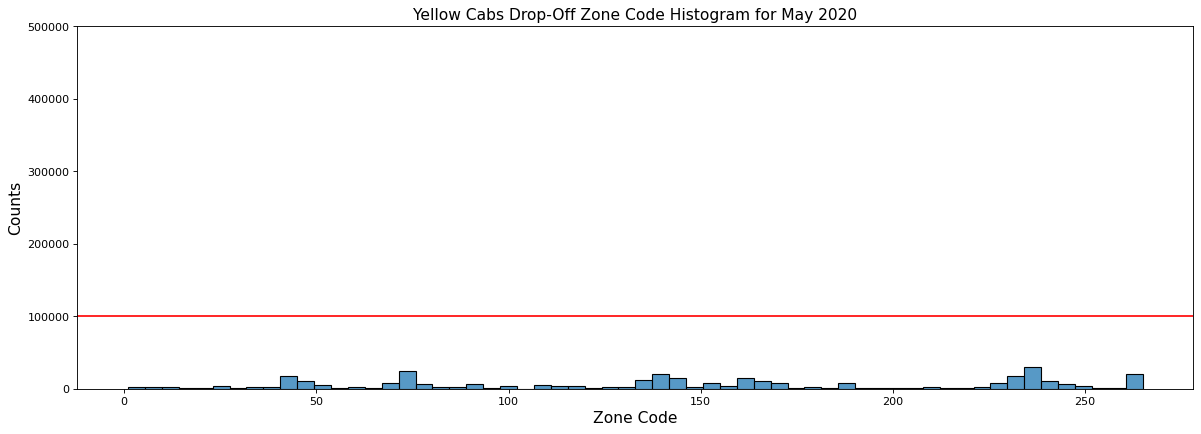

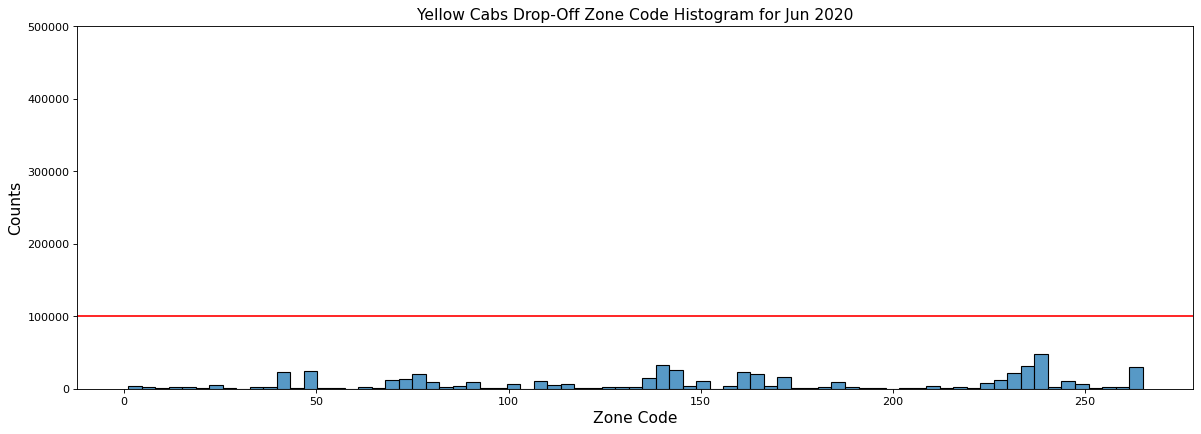

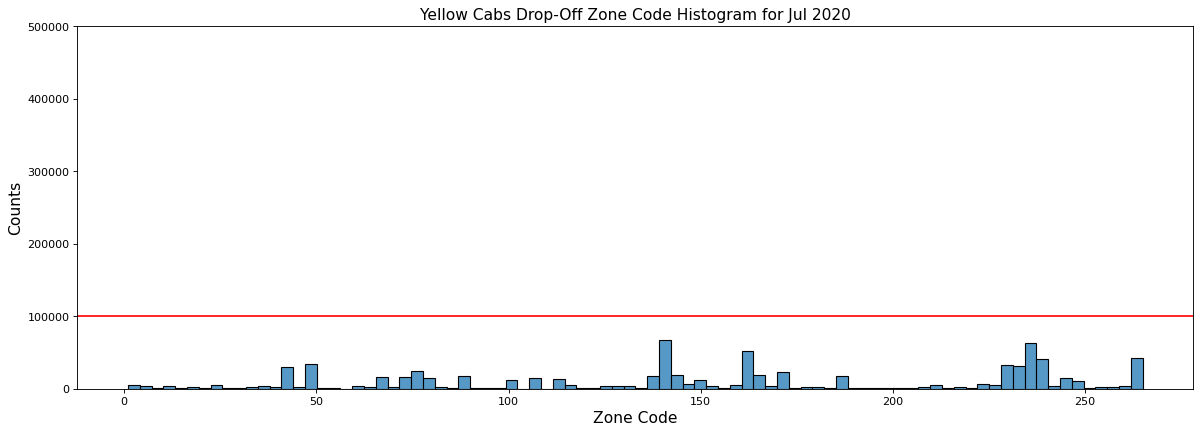

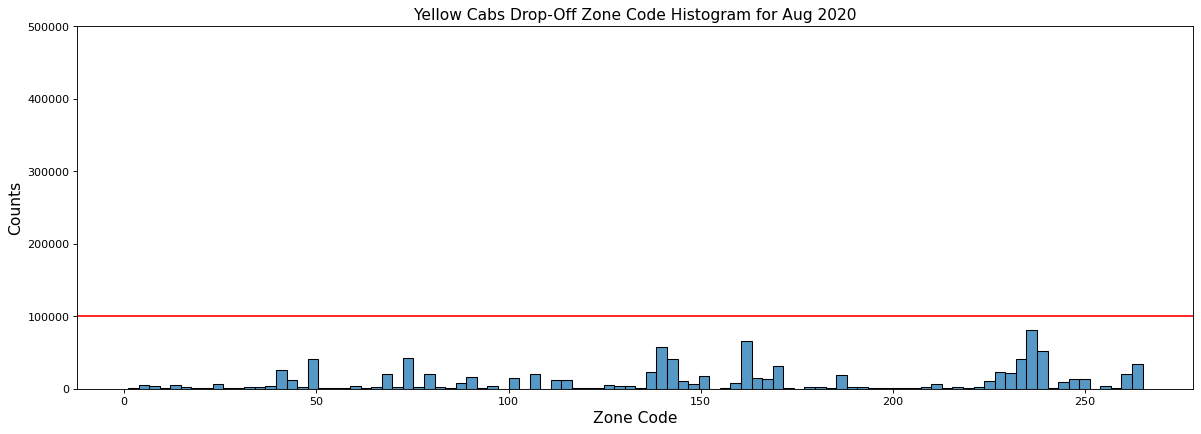

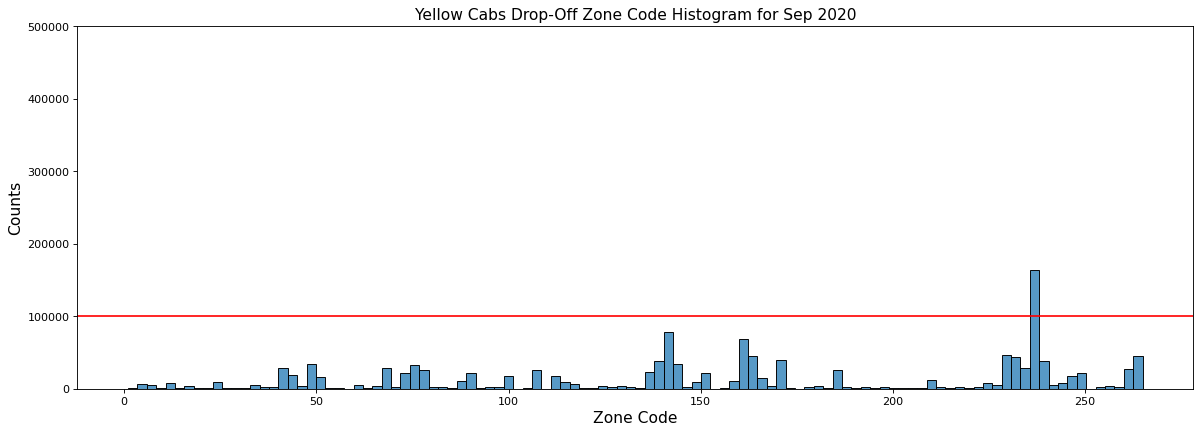

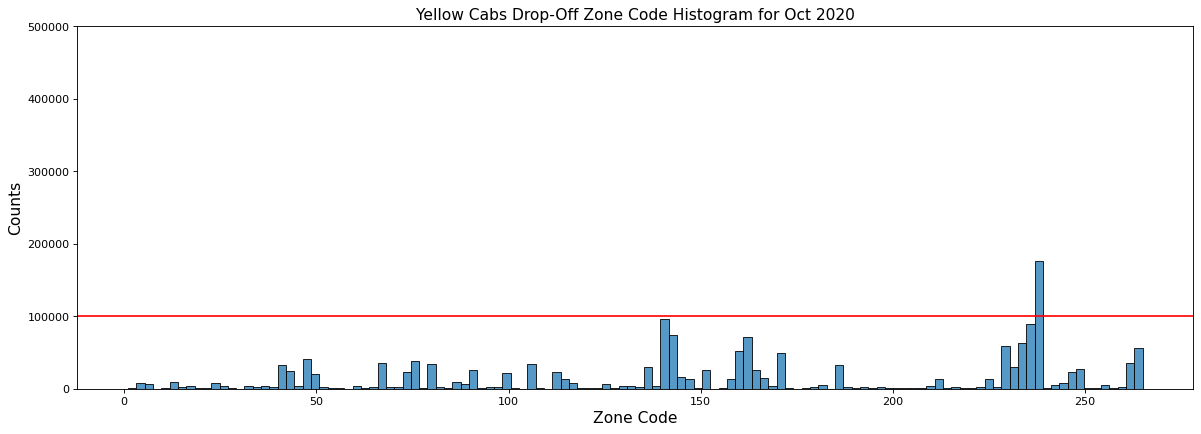

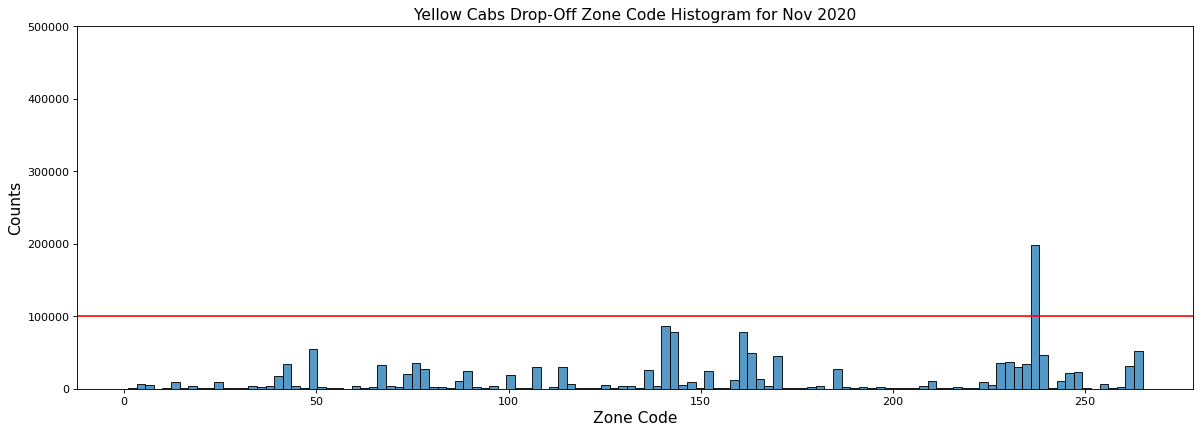

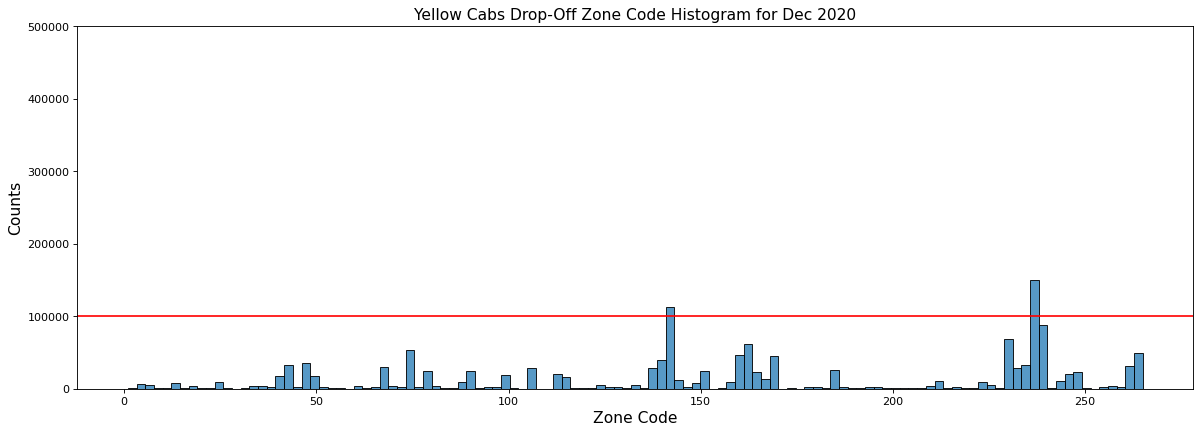

In [16]:
#dropoff_location zone
for i in range(len(yellow2020_clean)):
  figure(figsize=(18, 6), dpi=80)
  ax=sns.histplot(data=yellow2020_clean[i]['DOLocationID'])
  plt.title(f"Yellow Cabs Drop-Off Zone Code Histogram for {months_[i]} 2020", fontsize=14)
  plt.xlabel("Zone Code", fontsize=14)
  plt.ylabel("Counts", fontsize=14)
  ax.set_ylim(0, 500000)
  plt.axhline(y=100000, color='r', linestyle='-')
  fig = ax.get_figure()
  fig.savefig(f"/content/imgs/DO{i}.png")
  plt.show()

Potential conclusion:

In [15]:
#Generating PU Histogram GIF
gif_name = 'PU_Taxi_Zone_Frequencies'
fps = 0.5
file_list = ['/content/imgs/0.png',
 '/content/imgs/1.png',
 '/content/imgs/2.png',
 '/content/imgs/3.png',
 '/content/imgs/4.png',
 '/content/imgs/5.png',
 '/content/imgs/6.png',
 '/content/imgs/7.png',
 '/content/imgs/8.png',
 '/content/imgs/9.png', 
 '/content/imgs/10.png',
 '/content/imgs/11.png',] #file_list = ['/content/imgs0.png', '...]
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)


[MoviePy] Building file PU_Taxi_Zone_Frequencies.gif with imageio


 92%|█████████▏| 12/13 [00:01<00:00, 10.58it/s]


In [17]:
#Generating DO Histogram GIF
gif_name = 'DO_Taxi_Zone_Frequencies'
fps = 0.5
file_list = ['/content/imgs/DO0.png',
 '/content/imgs/DO1.png',
 '/content/imgs/DO2.png',
 '/content/imgs/DO3.png',
 '/content/imgs/DO4.png',
 '/content/imgs/DO5.png',
 '/content/imgs/DO6.png',
 '/content/imgs/DO7.png',
 '/content/imgs/DO8.png',
 '/content/imgs/DO9.png', 
 '/content/imgs/DO10.png',
 '/content/imgs/DO11.png',] #file_list = ['/content/imgs0.png', '...]
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)


[MoviePy] Building file DO_Taxi_Zone_Frequencies.gif with imageio


 92%|█████████▏| 12/13 [00:01<00:00, 10.46it/s]


In [ ]:
sorted(file_list)

['/content/imgs/0.png',
 '/content/imgs/1.png',
 '/content/imgs/10.png',
 '/content/imgs/11.png',
 '/content/imgs/2.png',
 '/content/imgs/3.png',
 '/content/imgs/4.png',
 '/content/imgs/5.png',
 '/content/imgs/6.png',
 '/content/imgs/7.png',
 '/content/imgs/8.png',
 '/content/imgs/9.png']

#Ignore everything below this for now

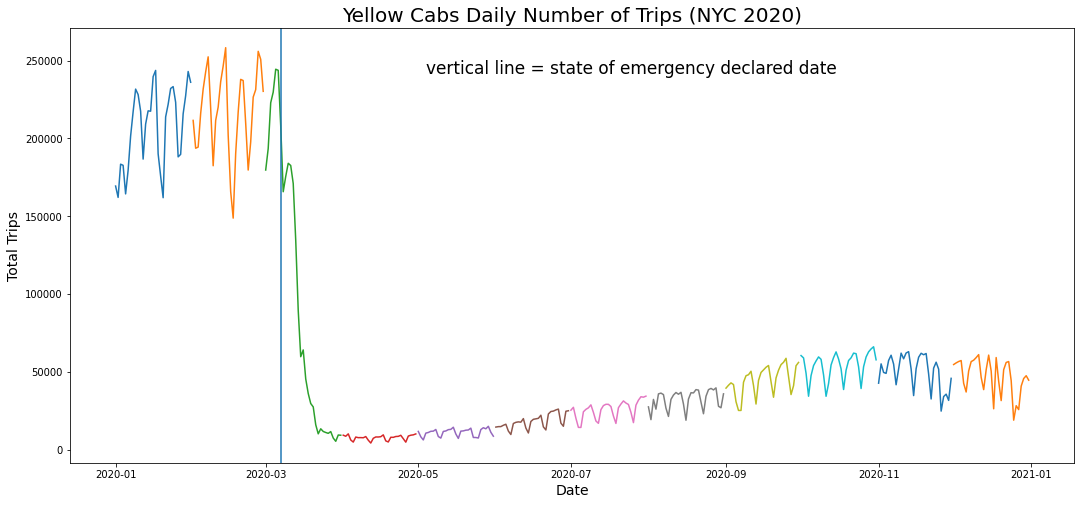

In [ ]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['trip_distance'].count().plot(figsize=(18,8))
plt.axvline("2020-03-07", 0, 250000)
plt.figtext(0.4, .8, "vertical line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Number of Trips (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Trips", fontsize=14)
plt.show()

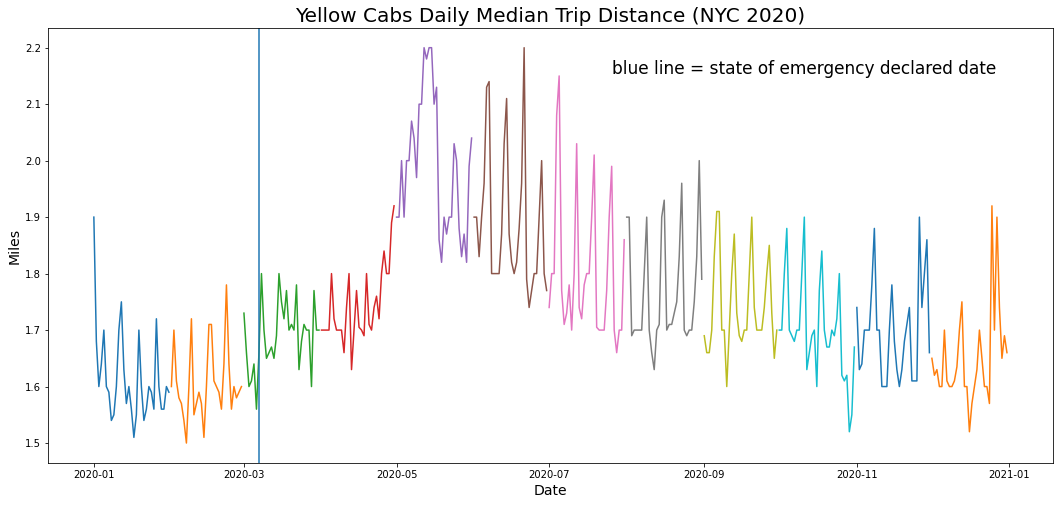

In [ ]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['trip_distance'].median().plot(title='Median Daily Trip Distance', figsize=(18,8))
plt.axvline("2020-03-07", 0, 250000)
plt.figtext(0.56, .8, "blue line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Median Trip Distance (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Miles", fontsize=14)
plt.show()

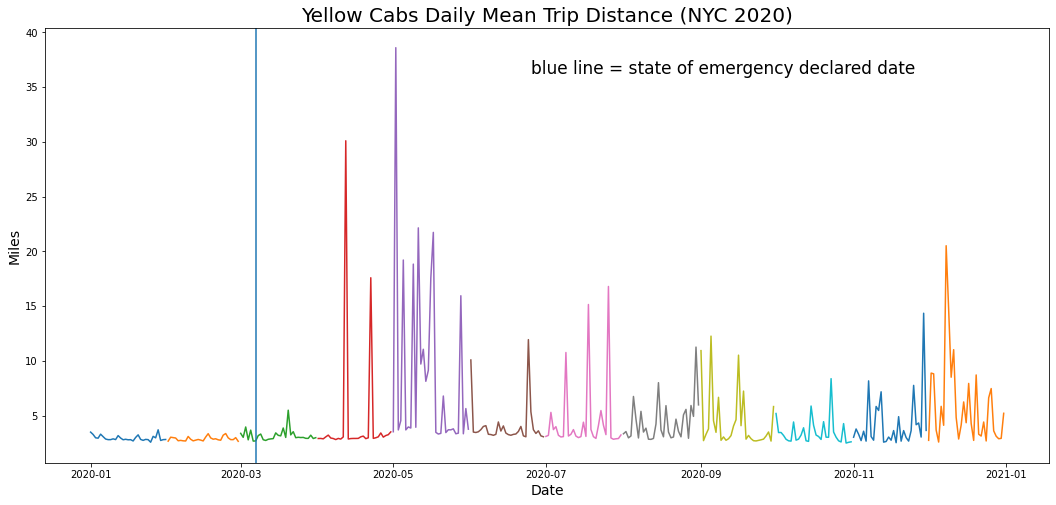

In [ ]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['trip_distance'].mean().plot(title='Mean Daily Trip Distance', figsize=(18,8))
plt.axvline("2020-03-07", 0, 250000)
plt.figtext(0.5, .8, "blue line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Mean Trip Distance (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Miles", fontsize=14)
plt.show()

In [ ]:
yellow2020_clean[0]['trip_distance'].sum()

18763690.540000003

In [ ]:
yellow2020_clean[0].groupby(yellow2020_clean[i].pick_up_date.dt.month)['trip_distance'].sum()

pick_up_date
12.0    4413536.96
Name: trip_distance, dtype: float64

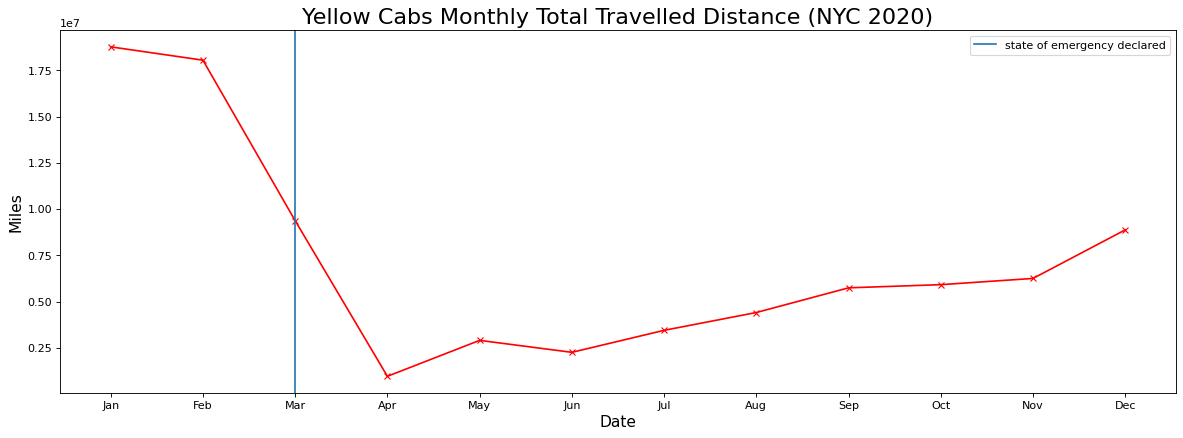

In [ ]:
total_distance=[]
for i in range(len(yellow2020_clean)):
  total_distance.append(yellow2020_clean[i]['trip_distance'].sum())

figure(figsize=(18, 6), dpi=80)
plt.plot(months_,total_distance, 'xr-')
plt.axvline(2, 0, 250000, label="state of emergency declared")
#plt.figtext(0.5, .8, "blue line = state of emergency declared date", fontsize=17)
plt.legend()
plt.title("Yellow Cabs Monthly Total Travelled Distance (NYC 2020)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Miles", fontsize=14)
plt.show()

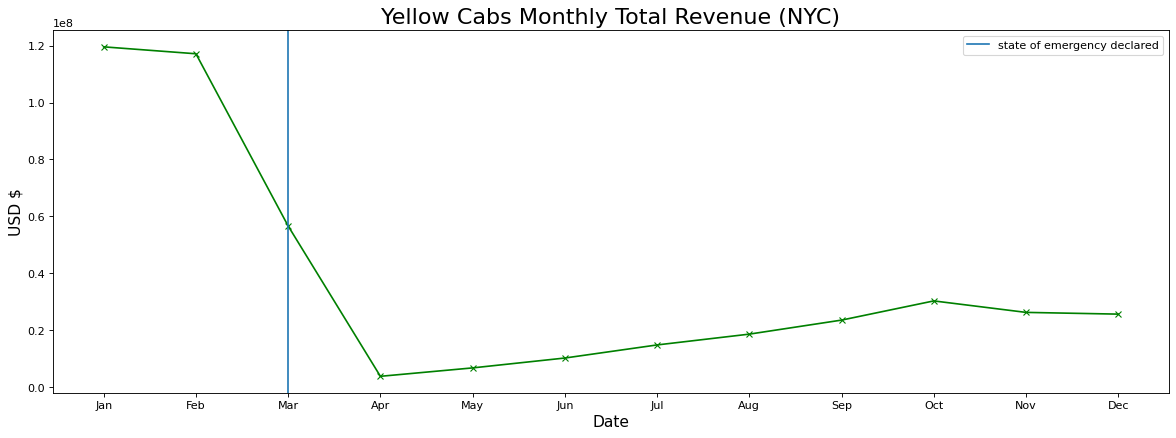

In [ ]:
total_fare=[]
for i in range(len(yellow2020_clean)):
  total_fare.append(yellow2020_clean[i]['total_amount'].sum())

figure(figsize=(18, 6), dpi=80)
plt.plot(months_,total_fare, 'xg-')
plt.axvline(2, 0, 250000, label="state of emergency declared")
#plt.figtext(0.5, .8, "blue line = state of emergency declared date", fontsize=17)
plt.legend()
plt.title("Yellow Cabs Monthly Total Revenue (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD $", fontsize=14)
plt.show()

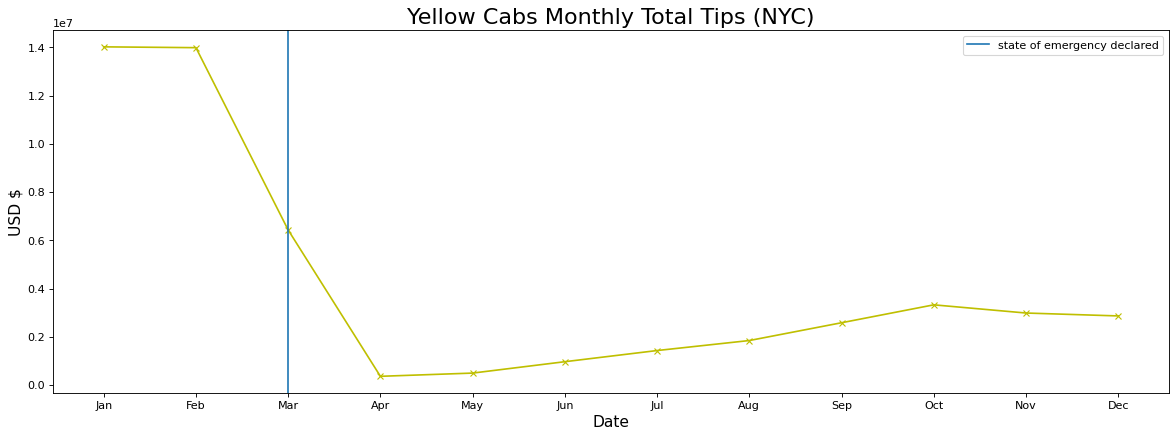

In [ ]:
total_tips=[]
for i in range(len(yellow2020_clean)):
  total_tips.append(yellow2020_clean[i]['tip_amount'].sum())

figure(figsize=(18, 6), dpi=80)
plt.plot(months_,total_tips, 'xy-')
plt.axvline(2, 0, 250000, label="state of emergency declared")
#plt.figtext(0.5, .8, "blue line = state of emergency declared date", fontsize=17)
plt.legend()
plt.title("Yellow Cabs Monthly Total Tips (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD $", fontsize=14)
plt.show()

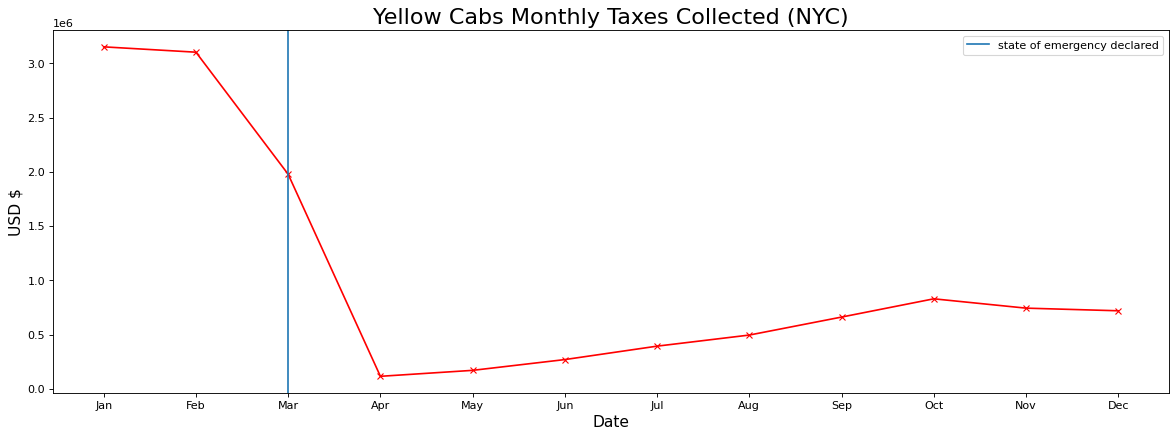

In [ ]:
total_tax=[]
for i in range(len(yellow2020_clean)):
  total_tax.append(yellow2020_clean[i]['mta_tax'].sum())

figure(figsize=(18, 6), dpi=80)
plt.plot(months_,total_tax, 'xr-')
plt.axvline(2, 0, 250000, label="state of emergency declared")
#plt.figtext(0.5, .8, "blue line = state of emergency declared date", fontsize=17)
plt.legend()
plt.title("Yellow Cabs Monthly Taxes Collected (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD $", fontsize=14)
plt.show()

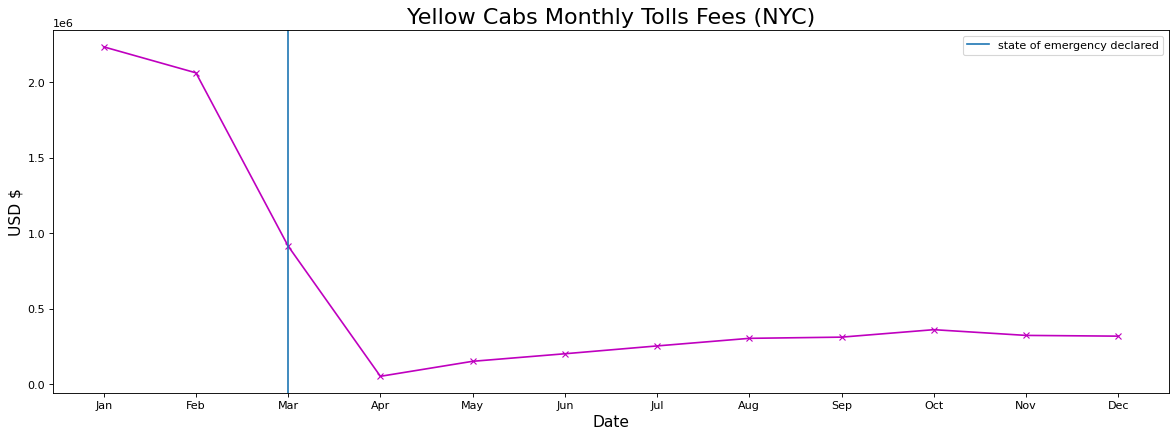

In [ ]:
total_toll=[]
for i in range(len(yellow2020_clean)):
  total_toll.append(yellow2020_clean[i]['tolls_amount'].sum())

figure(figsize=(18, 6), dpi=80)
plt.plot(months_,total_toll, 'xm-')
plt.axvline(2, 0, 250000, label="state of emergency declared")
#plt.figtext(0.5, .8, "blue line = state of emergency declared date", fontsize=17)
plt.legend()
plt.title("Yellow Cabs Monthly Tolls Fees (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD $", fontsize=14)
plt.show()

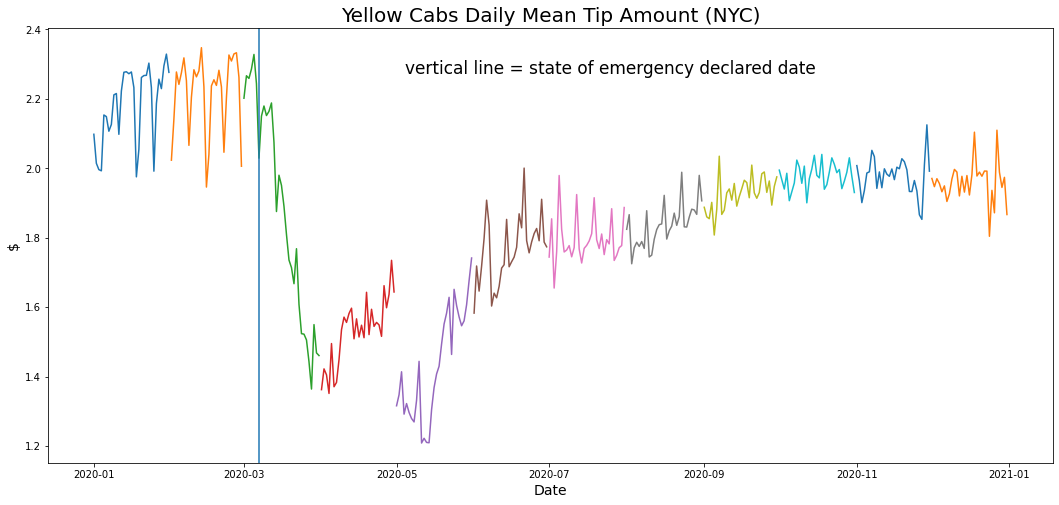

In [ ]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['tip_amount'].mean().plot(figsize=(18,8))
plt.axvline("2020-03-07", 0, 250000)
plt.figtext(0.4, .8, "vertical line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Mean Tip Amount (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("$", fontsize=14)
plt.show()

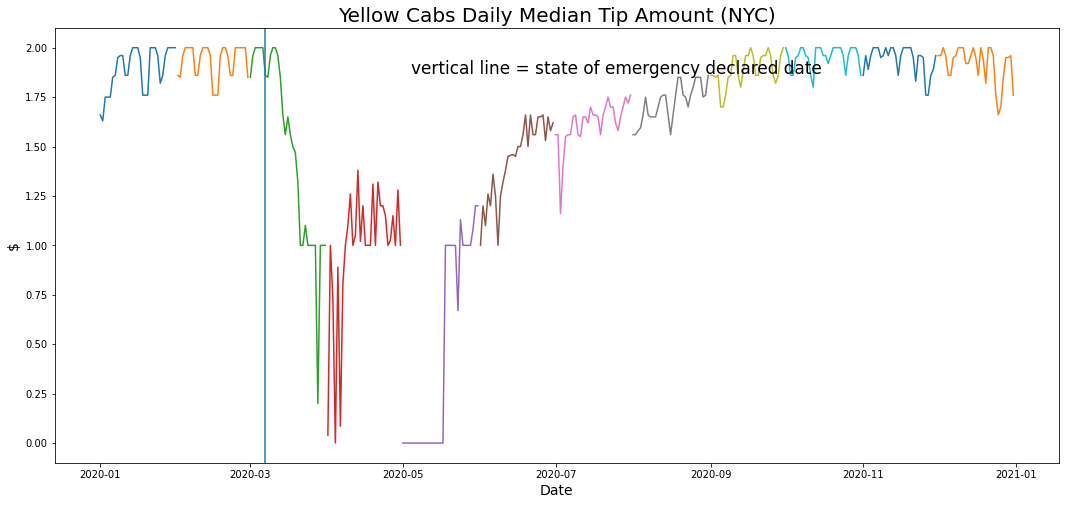

In [ ]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['tip_amount'].median().plot(figsize=(18,8), title='Daily Median Tip Amount')
plt.axvline("2020-03-07", 0, 250000)
plt.figtext(0.4, .8, "vertical line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Median Tip Amount (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("$", fontsize=14)
plt.show()

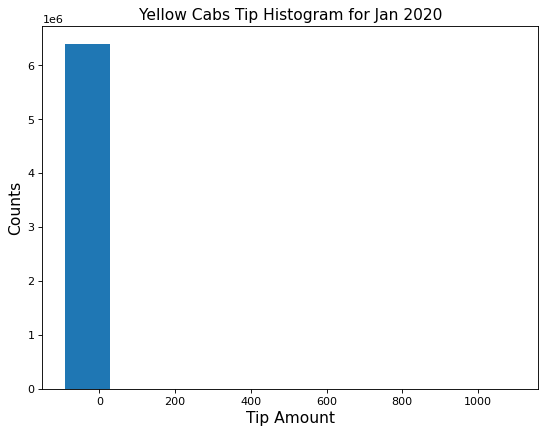

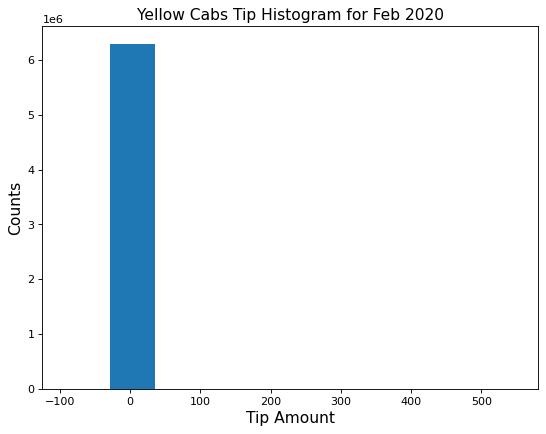

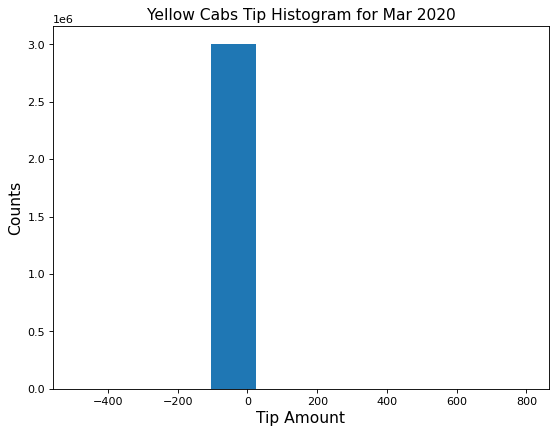

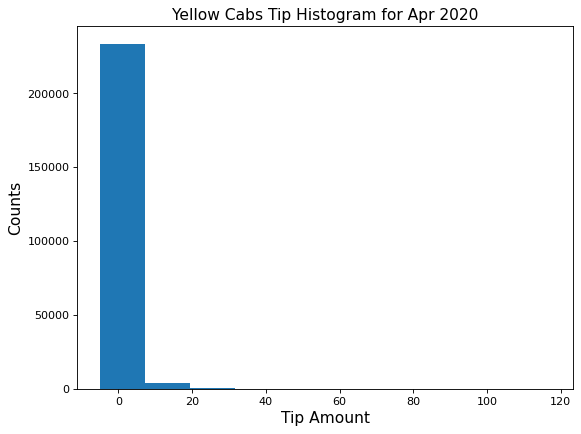

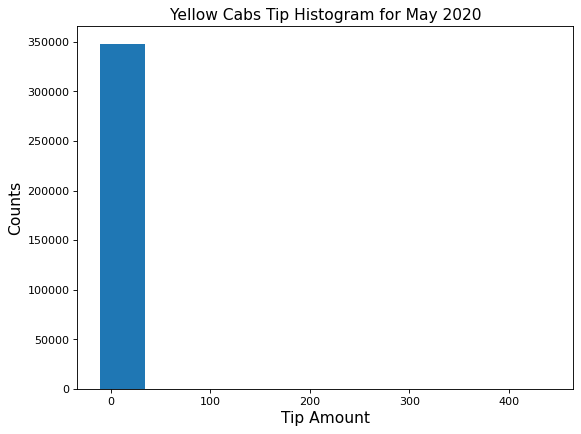

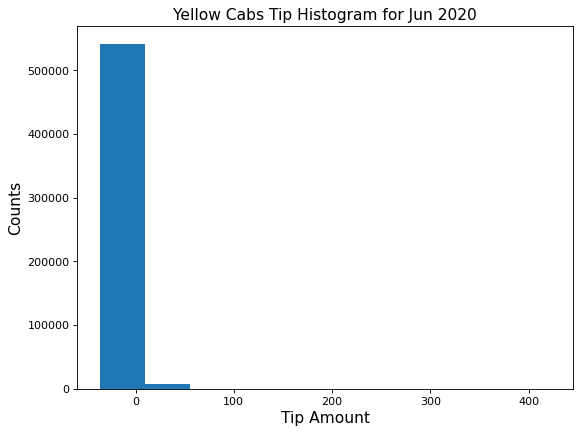

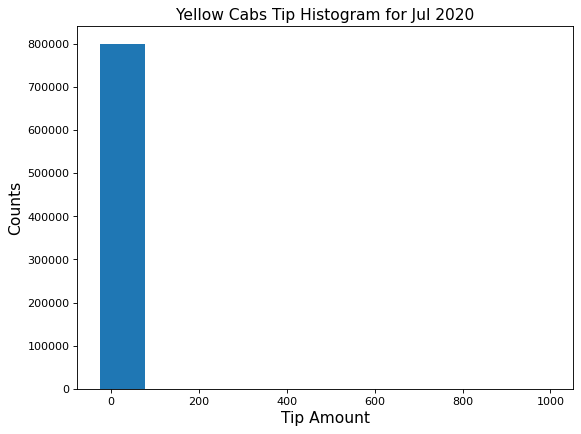

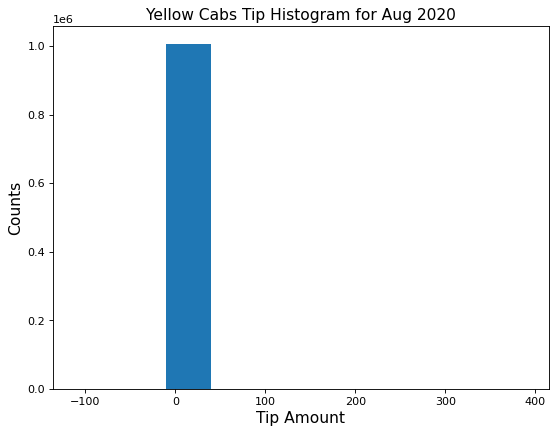

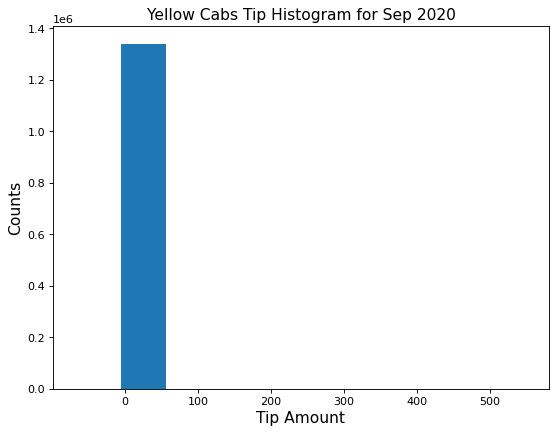

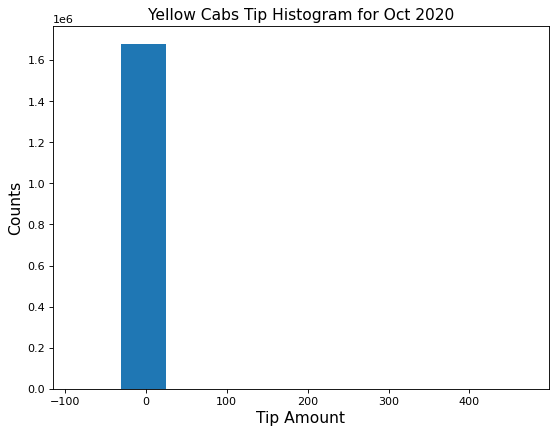

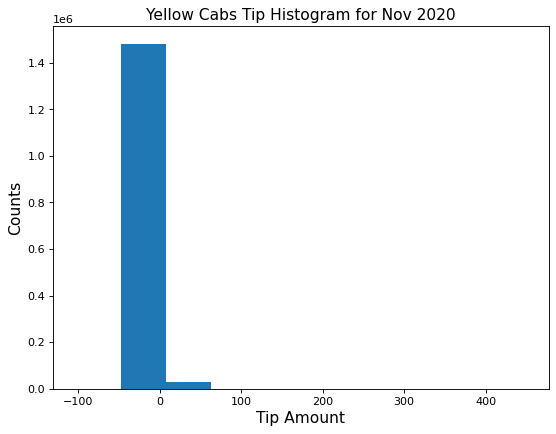

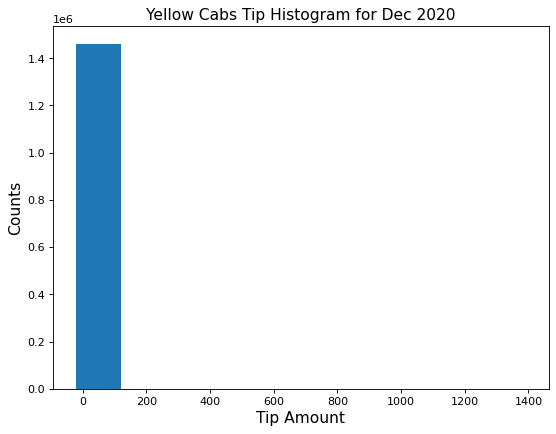

In [ ]:
for i in range(len(yellow2020_clean)):
  figure(figsize=(8, 6), dpi=80)
  plt.hist(yellow2020_clean[i]['tip_amount'])
  plt.title(f"Yellow Cabs Tip Histogram for {months_[i]} 2020", fontsize=14)
  plt.xlabel("Tip Amount", fontsize=14)
  plt.ylabel("Counts", fontsize=14)
  plt.show()


In [ ]:
tip={}
for elem in range(len(months)):
  tip[elem] = yellow2020_clean[elem].loc[yellow2020_clean[elem]['tip_amount']>0]

In [ ]:
for i in range(len(yellow2020_clean)):
  figure(figsize=(8, 6), dpi=80)
  plt.hist(tip[i])
  plt.title(f"Yellow Cabs Tip Histogram for {months_[i]} 2020", fontsize=14)
  plt.xlabel("Tip Amount", fontsize=14)
  plt.ylabel("Counts", fontsize=14)
  plt.show()


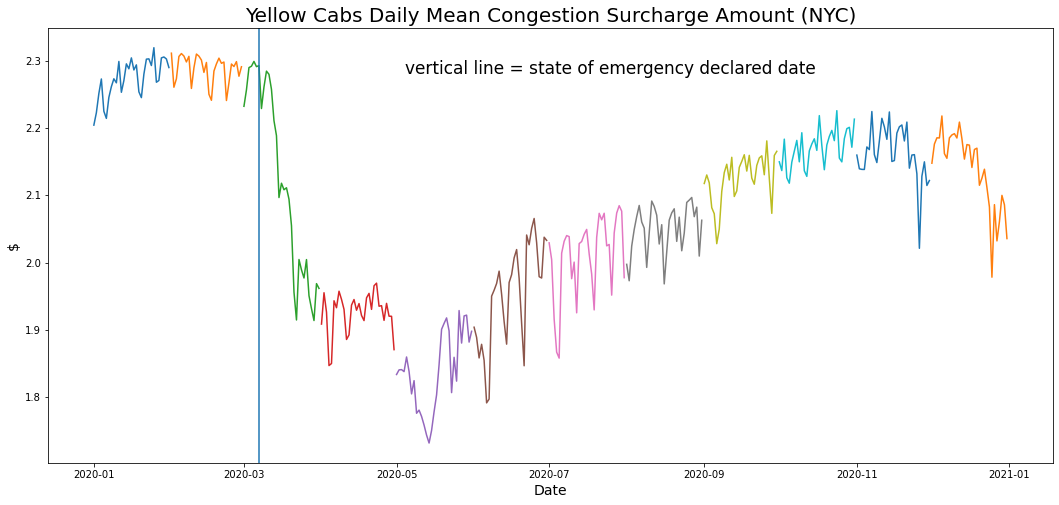

In [ ]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['congestion_surcharge'].mean().plot(figsize=(18,8))
plt.axvline("2020-03-07", 0, 250000)
plt.figtext(0.4, .8, "vertical line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Mean Congestion Surcharge Amount (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("$", fontsize=14)
plt.show()


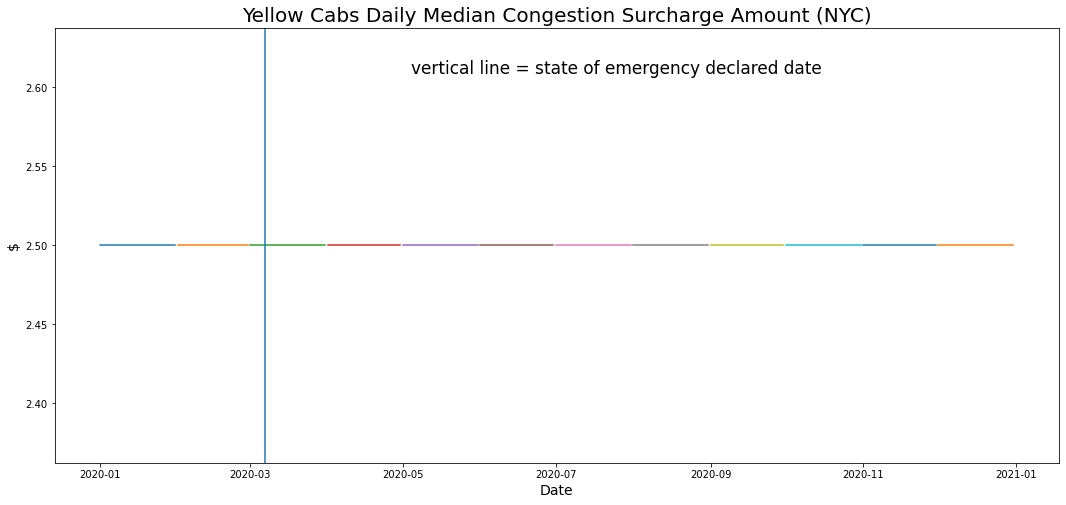

In [ ]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['congestion_surcharge'].median().plot(figsize=(18,8))
plt.axvline("2020-03-07", 0, 250000)
plt.figtext(0.4, .8, "vertical line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Median Congestion Surcharge Amount (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("$", fontsize=14)
plt.show()


In [ ]:
for i in range(len(yellow2020_clean)):
  print(yellow2020_clean[i]['congestion_surcharge'].value_counts())

 2.50    5845396
 0.00     543827
-2.50      15423
 2.75         76
 0.75         68
 0.50          4
-0.75          1
 2.00          1
Name: congestion_surcharge, dtype: int64
 2.50    5784685
 0.00     498221
-2.50      16025
 0.75         60
 2.75         58
 1.50          1
 1.00          1
Name: congestion_surcharge, dtype: int64
 2.50    2704693
 0.00     293560
-2.50       8586
 0.75         25
 1.00          1
-0.75          1
Name: congestion_surcharge, dtype: int64
 2.5    184281
 0.0     52675
-2.5       905
Name: congestion_surcharge, dtype: int64
 2.5    257482
 0.0     89820
-2.5      1045
 1.0         1
Name: congestion_surcharge, dtype: int64
 2.5    434635
 0.0    113174
-2.5      1942
Name: congestion_surcharge, dtype: int64
 2.5    649493
 0.0    148109
-2.5      2798
 0.5         1
 0.8         1
Name: congestion_surcharge, dtype: int64
 2.50    831546
 0.00    171926
-2.50      3794
 0.75         2
Name: congestion_surcharge, dtype: int64
 2.50    1147332
 0.00    

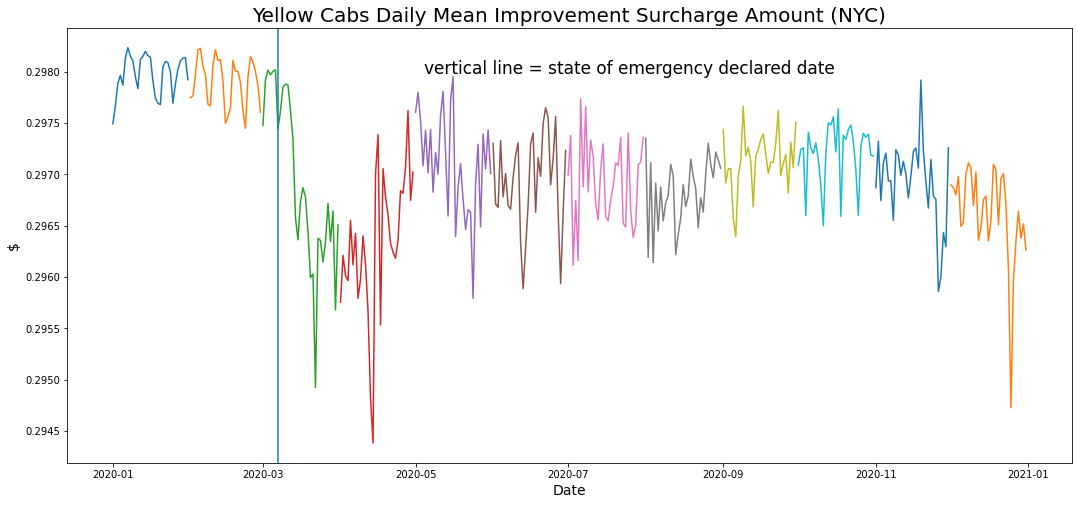

In [ ]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['improvement_surcharge'].mean().plot(figsize=(18,8))
plt.axvline("2020-03-07", 0, 250000)
plt.figtext(0.4, .8, "vertical line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Mean Improvement Surcharge Amount (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("$", fontsize=14)
plt.show()


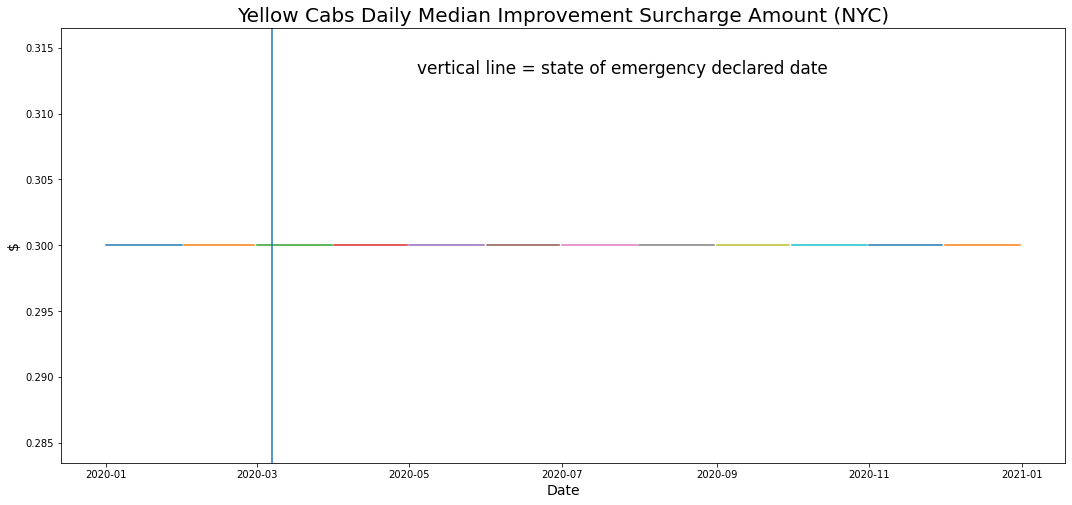

In [ ]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['improvement_surcharge'].median().plot(figsize=(18,8),title='Daily Congestion Surcharge Median')
plt.axvline("2020-03-07", 0, 250000)
plt.figtext(0.4, .8, "vertical line = state of emergency declared date", fontsize=17)
plt.title("Yellow Cabs Daily Median Improvement Surcharge Amount (NYC)", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("$", fontsize=14)
plt.show()

In [ ]:
for i in range(len(yellow2020_clean)):
  print(yellow2020_clean[i]['improvement_surcharge'].value_counts())

 0.3    6381271
-0.3      19448
 0.0       4077
Name: improvement_surcharge, dtype: int64
 0.3    6275290
-0.3      19983
 0.0       3778
Name: improvement_surcharge, dtype: int64
 0.3    2993742
-0.3      11026
 0.0       2098
Name: improvement_surcharge, dtype: int64
 0.3    236241
-0.3      1291
 0.0       329
Name: improvement_surcharge, dtype: int64
 0.3    346506
-0.3      1518
 0.0       324
Name: improvement_surcharge, dtype: int64
 0.3    546722
-0.3      2505
 0.0       524
Name: improvement_surcharge, dtype: int64
 0.3    795932
-0.3      3686
 0.0       784
Name: improvement_surcharge, dtype: int64
 0.3    1001517
-0.3       4870
 0.0        881
Name: improvement_surcharge, dtype: int64
 0.3    1334162
-0.3       5937
 0.0        779
Name: improvement_surcharge, dtype: int64
 0.3    1672949
-0.3       7299
 0.0        851
Name: improvement_surcharge, dtype: int64
 0.3    1500937
-0.3       7199
 0.0        737
Name: improvement_surcharge, dtype: int64
 0.3    1453443
-0.3  

In [ ]:
yellow2020_clean[0].loc[yellow2020_clean[0]['total_amount']<0].sum()

VendorID                                                             38878
tpep_pickup_datetime     2020-01-01 00:54:282020-01-01 00:57:132020-01-...
tpep_dropoff_datetime    2020-01-01 00:58:412020-01-01 00:58:052020-01-...
passenger_count                                                      28244
trip_distance                                                      34413.3
RatecodeID                                                           22723
PULocationID                                                       3143712
DOLocationID                                                       3125391
payment_type                                                         63530
fare_amount                                                        -242580
extra                                                             -6927.15
mta_tax                                                            -9492.5
tip_amount                                                          260.82
tolls_amount             

In [ ]:
yellow2020_clean[0].iloc[1:10,:]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pick_up_date,year,month
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020-01-01 00:35:39,2020,1
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020-01-01 00:47:41,2020,1
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020-01-01 00:55:23,2020,1
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2020-01-01 00:01:58,2020,1
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,2020-01-01 00:09:44,2020,1
6,2.0,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,N,193,193,1.0,2.5,0.5,0.5,0.01,0.0,0.3,3.81,0.0,2020-01-01 00:39:25,2020,1
9,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.70,1.0,N,246,48,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,2020-01-01 00:29:01,2020,1
10,1.0,2020-01-01 00:55:11,2020-01-01 01:12:03,2.0,2.40,1.0,N,246,79,1.0,12.0,3.0,0.5,1.75,0.0,0.3,17.55,2.5,2020-01-01 00:55:11,2020,1
11,1.0,2020-01-01 00:37:15,2020-01-01 00:51:41,1.0,0.80,1.0,N,163,161,2.0,9.5,3.0,0.5,0.00,0.0,0.3,13.30,2.5,2020-01-01 00:37:15,2020,1


In [ ]:
yellow2020_clean[0].iloc[158:160,:]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pick_up_date,year,month
160,2.0,2020-01-01 00:54:28,2020-01-01 00:58:41,1.0,0.6,1.0,N,170,137,3.0,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-8.3,-2.5,2020-01-01 00:54:28,2020,1
161,2.0,2020-01-01 00:54:28,2020-01-01 00:58:41,1.0,0.6,1.0,N,170,137,2.0,4.5,0.5,0.5,0.0,0.0,0.3,8.3,2.5,2020-01-01 00:54:28,2020,1


In [ ]:
yellow2020_clean[0].iloc[1004:1006,:]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pick_up_date,year,month
1007,2.0,2020-01-01 00:13:39,2020-01-01 00:24:26,2.0,1.26,1.0,N,249,68,4.0,-8.5,-0.5,-0.5,0.0,0.0,-0.3,-12.3,-2.5,2020-01-01 00:13:39,2020,1
1008,2.0,2020-01-01 00:13:39,2020-01-01 00:24:26,2.0,1.26,1.0,N,249,90,2.0,8.5,0.5,0.5,0.0,0.0,0.3,12.3,2.5,2020-01-01 00:13:39,2020,1


In [ ]:
yellow2020_clean[0].iloc[[157]]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pick_up_date,year,month
159,2.0,2020-01-01 00:47:49,2020-01-01 00:52:27,1.0,0.74,1.0,N,107,137,1.0,5.0,0.5,0.5,0.88,0.0,0.3,9.68,2.5,2020-01-01 00:47:49,2020,1


In [ ]:
yellow2020_clean[0].iloc[[158]]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pick_up_date,year,month
160,2.0,2020-01-01 00:54:28,2020-01-01 00:58:41,1.0,0.6,1.0,N,170,137,3.0,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-8.3,-2.5,2020-01-01 00:54:28,2020,1


In [ ]:
yellow2020_clean[0].iloc[[159]]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pick_up_date,year,month
161,2.0,2020-01-01 00:54:28,2020-01-01 00:58:41,1.0,0.6,1.0,N,170,137,2.0,4.5,0.5,0.5,0.0,0.0,0.3,8.3,2.5,2020-01-01 00:54:28,2020,1


In [ ]:
yellow2020_clean[0].loc[yellow2020_clean[0]['improvement_surcharge']==-0.3]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pick_up_date,year,month
160,2.0,2020-01-01 00:54:28,2020-01-01 00:58:41,1.0,0.60,1.0,N,170,137,3.0,-4.50,-0.50,-0.5,0.0,0.0,-0.3,-8.30,-2.5,2020-01-01 00:54:28,2020,1
372,2.0,2020-01-01 00:57:13,2020-01-01 00:58:05,1.0,0.11,1.0,N,260,260,3.0,-2.50,-0.50,-0.5,0.0,0.0,-0.3,-3.80,0.0,2020-01-01 00:57:13,2020,1
667,2.0,2020-01-01 00:36:31,2020-01-01 00:37:23,3.0,0.18,1.0,N,141,141,3.0,-3.00,-0.50,-0.5,0.0,0.0,-0.3,-6.80,-2.5,2020-01-01 00:36:31,2020,1
677,2.0,2020-01-01 00:23:15,2020-01-01 00:23:54,2.0,0.09,1.0,N,114,114,3.0,-2.50,-0.50,-0.5,0.0,0.0,-0.3,-6.30,-2.5,2020-01-01 00:23:15,2020,1
1007,2.0,2020-01-01 00:13:39,2020-01-01 00:24:26,2.0,1.26,1.0,N,249,68,4.0,-8.50,-0.50,-0.5,0.0,0.0,-0.3,-12.30,-2.5,2020-01-01 00:13:39,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6369203,NaN,2020-01-11 15:53:10,2020-01-11 15:56:00,NaN,0.00,NaN,NaN,246,246,NaN,-32.17,0.00,-0.5,0.0,0.0,-0.3,-32.97,0.0,2020-01-11 15:53:10,2020,1
6376201,NaN,2020-01-15 06:58:10,2020-01-15 06:59:00,NaN,0.04,NaN,NaN,238,238,NaN,-21.10,0.00,-0.5,0.0,0.0,-0.3,-21.90,0.0,2020-01-15 06:58:10,2020,1
6381356,NaN,2020-01-16 15:27:10,2020-01-16 15:48:00,NaN,0.00,NaN,NaN,137,137,NaN,43.42,2.75,-0.5,0.0,0.0,-0.3,45.37,0.0,2020-01-16 15:27:10,2020,1
6389169,NaN,2020-01-22 14:55:10,2020-01-22 14:55:00,NaN,0.00,NaN,NaN,166,264,NaN,-32.07,0.00,-0.5,0.0,0.0,-0.3,-32.87,0.0,2020-01-22 14:55:10,2020,1


In [ ]:
yellow2020_clean[0].loc[yellow2020_clean[0]['congestion_surcharge']==-2.5]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pick_up_date,year,month
160,2.0,2020-01-01 00:54:28,2020-01-01 00:58:41,1.0,0.60,1.0,N,170,137,3.0,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-8.3,-2.5,2020-01-01 00:54:28,2020,1
667,2.0,2020-01-01 00:36:31,2020-01-01 00:37:23,3.0,0.18,1.0,N,141,141,3.0,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-6.8,-2.5,2020-01-01 00:36:31,2020,1
677,2.0,2020-01-01 00:23:15,2020-01-01 00:23:54,2.0,0.09,1.0,N,114,114,3.0,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-6.3,-2.5,2020-01-01 00:23:15,2020,1
1007,2.0,2020-01-01 00:13:39,2020-01-01 00:24:26,2.0,1.26,1.0,N,249,68,4.0,-8.5,-0.5,-0.5,0.0,0.0,-0.3,-12.3,-2.5,2020-01-01 00:13:39,2020,1
1449,2.0,2020-01-01 00:18:16,2020-01-01 00:18:42,1.0,0.03,1.0,N,164,164,4.0,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-6.3,-2.5,2020-01-01 00:18:16,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6337812,2.0,2020-01-31 23:24:40,2020-01-31 23:50:34,3.0,4.49,1.0,N,148,48,2.0,-19.5,-0.5,-0.5,0.0,0.0,-0.3,-23.3,-2.5,2020-01-31 23:24:40,2020,1
6338071,2.0,2020-01-31 23:52:53,2020-02-01 00:22:09,1.0,7.28,1.0,N,229,36,4.0,-25.5,-0.5,-0.5,0.0,0.0,-0.3,-29.3,-2.5,2020-01-31 23:52:53,2020,1
6338169,2.0,2020-01-31 23:25:44,2020-01-31 23:29:59,1.0,0.96,1.0,N,48,186,4.0,-5.0,-0.5,-0.5,0.0,0.0,-0.3,-8.8,-2.5,2020-01-31 23:25:44,2020,1
6338894,2.0,2020-01-31 23:30:03,2020-01-31 23:38:09,1.0,0.84,1.0,N,48,186,3.0,-6.5,-0.5,-0.5,0.0,0.0,-0.3,-10.3,-2.5,2020-01-31 23:30:03,2020,1


In [ ]:
for i in range(len(yellow2020_clean)):
  print(yellow2020_clean[i]['PULocationID'].nunique())

261
259
260
250
260
257
259
259
259
260
260
260


In [ ]:
for i in range(len(yellow2020_clean)):
  print(yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.month)['PULocationID'].value_counts())

pick_up_date  PULocationID
1             237             292983
              161             282210
              236             272587
              162             235594
              186             228742
                               ...  
              176                  2
              245                  2
              30                   1
              172                  1
              204                  1
Name: PULocationID, Length: 261, dtype: int64
pick_up_date  PULocationID
2             161             277362
              237             276287
              236             258654
              162             232532
              230             226265
                               ...  
              172                  4
              99                   3
              105                  3
              30                   1
              176                  1
Name: PULocationID, Length: 259, dtype: int64
pick_up_date  PULocationID
3            

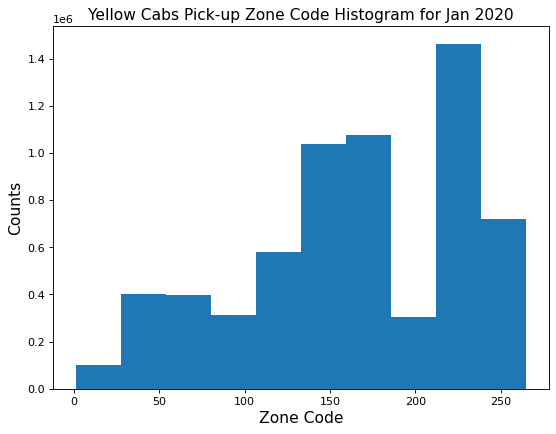

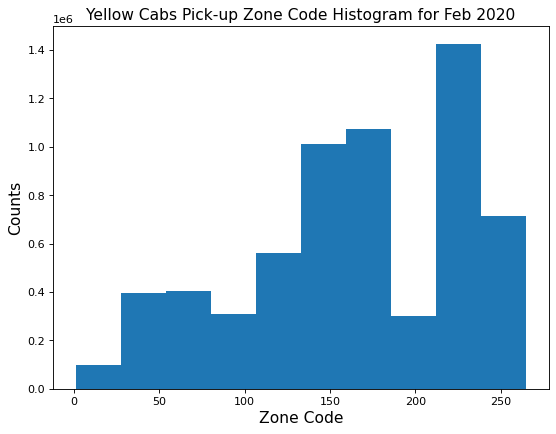

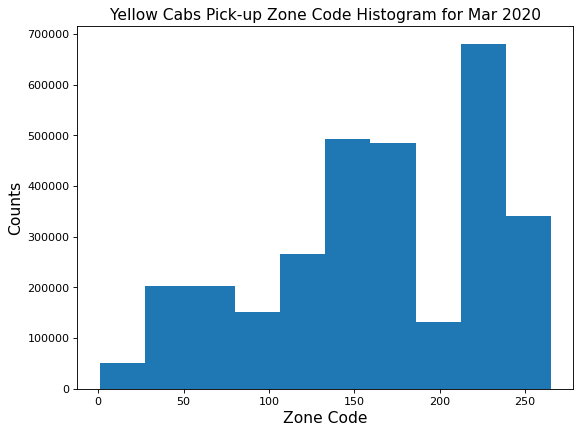

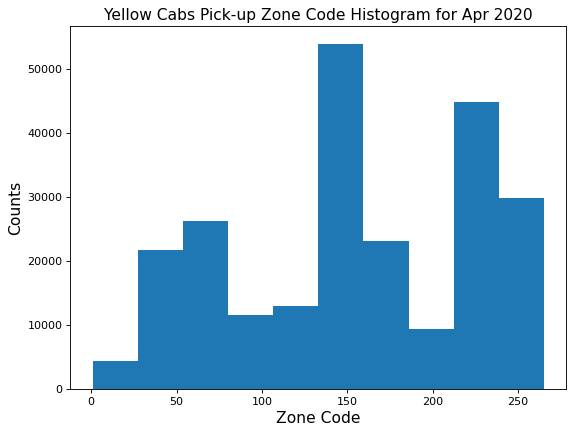

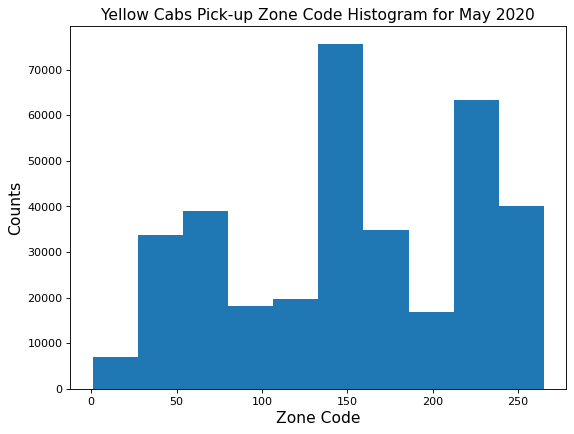

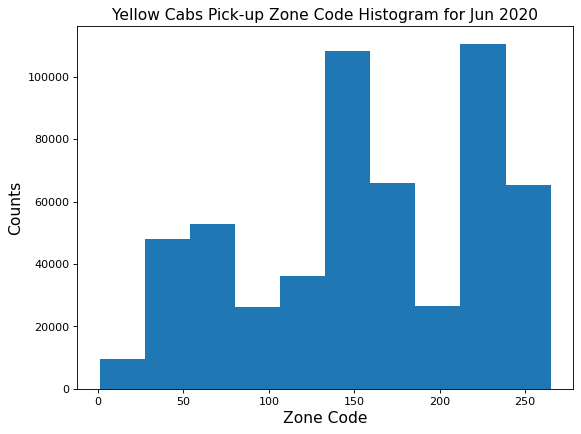

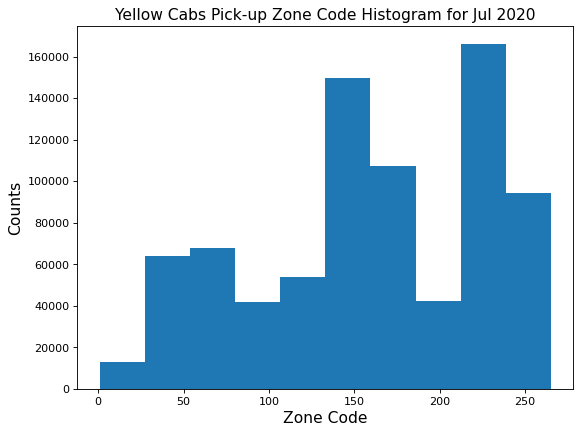

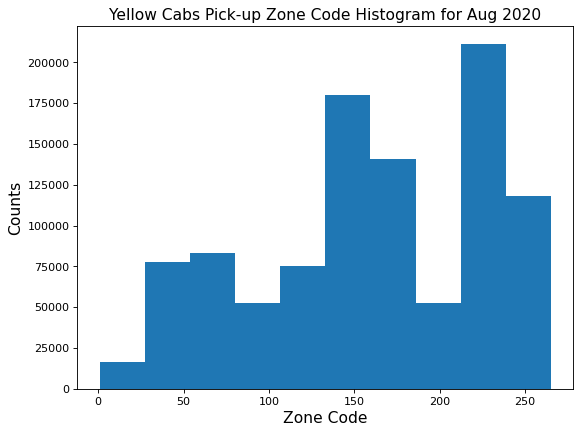

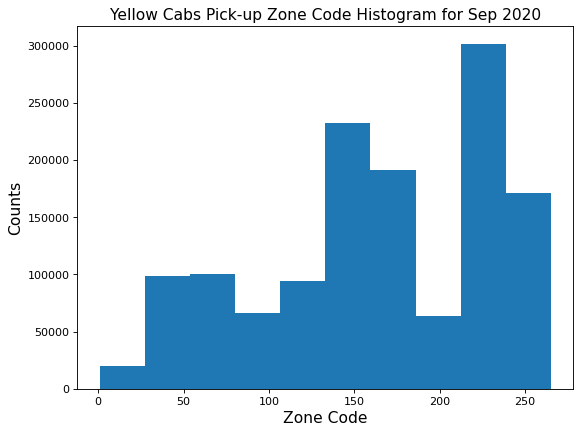

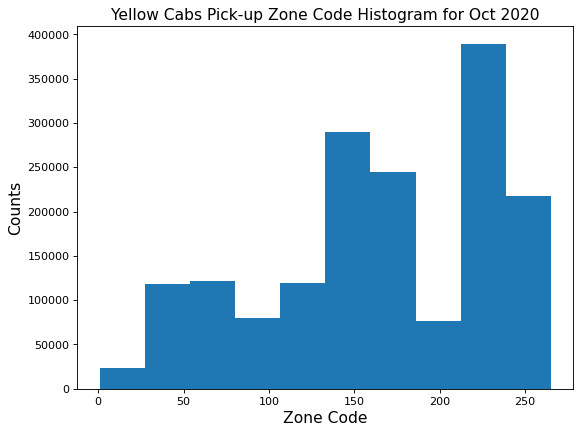

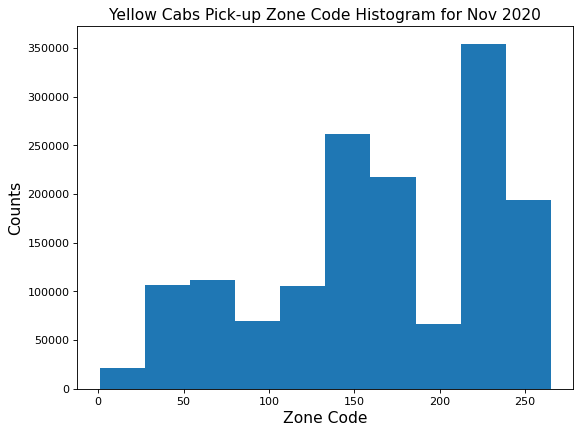

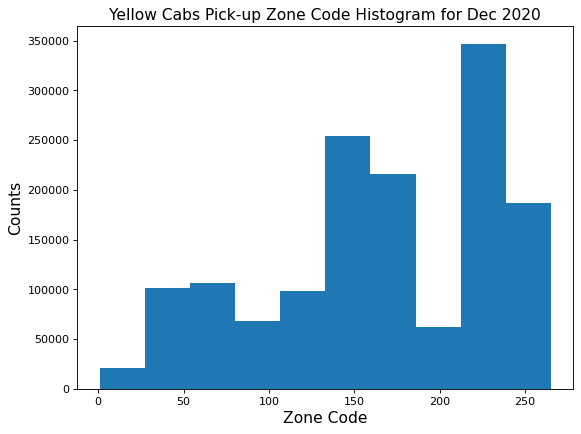

In [ ]:
for i in range(len(yellow2020_clean)):
  figure(figsize=(8, 6), dpi=80)
  plt.hist(yellow2020_clean[i]['PULocationID'])
  plt.title(f"Yellow Cabs Pick-up Zone Code Histogram for {months_[i]} 2020", fontsize=14)
  plt.xlabel("Zone Code", fontsize=14)
  plt.ylabel("Counts", fontsize=14)
  plt.show()

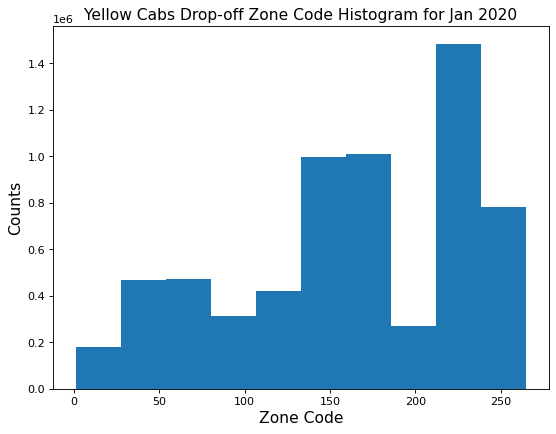

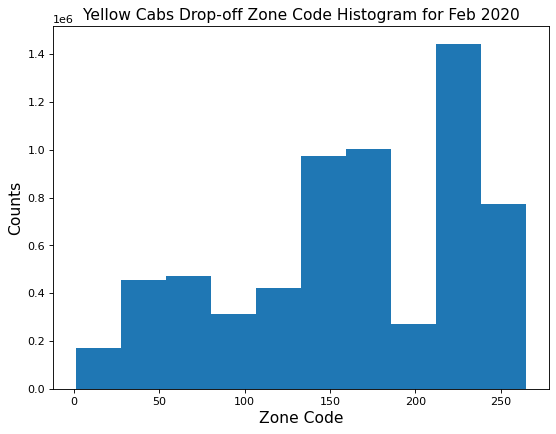

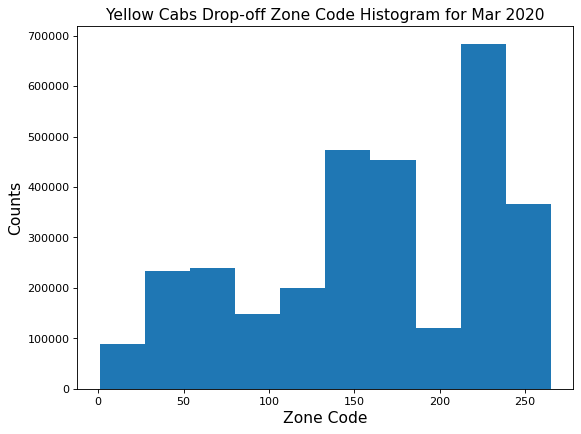

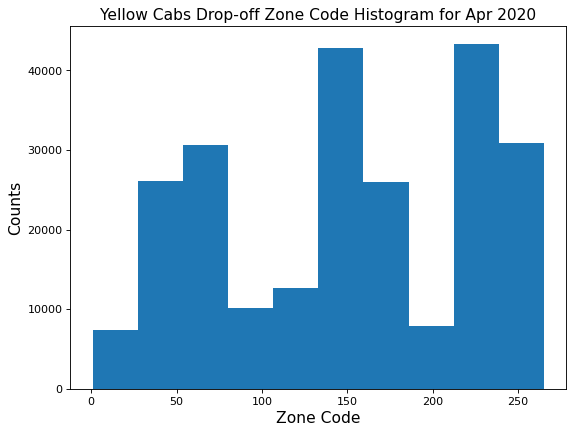

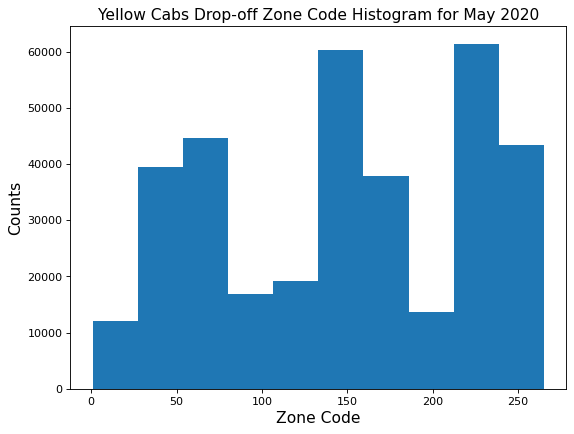

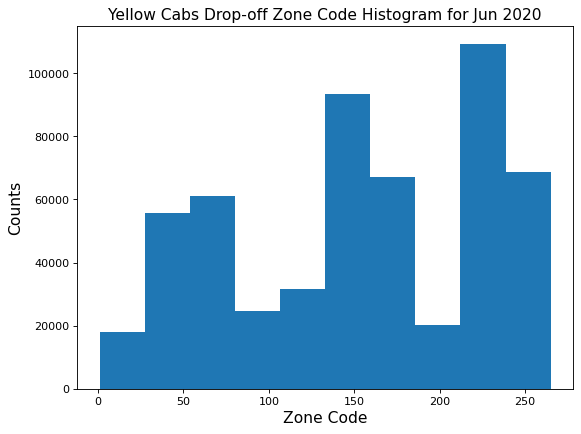

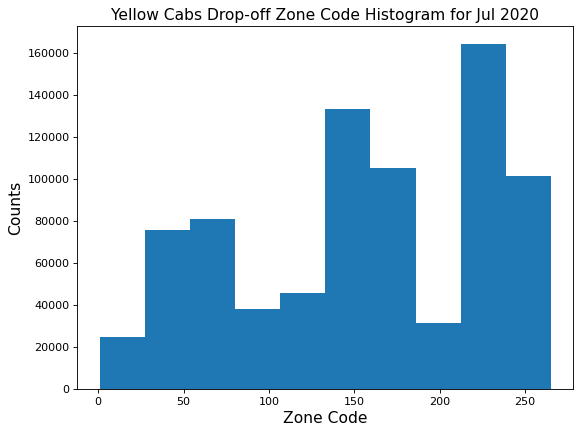

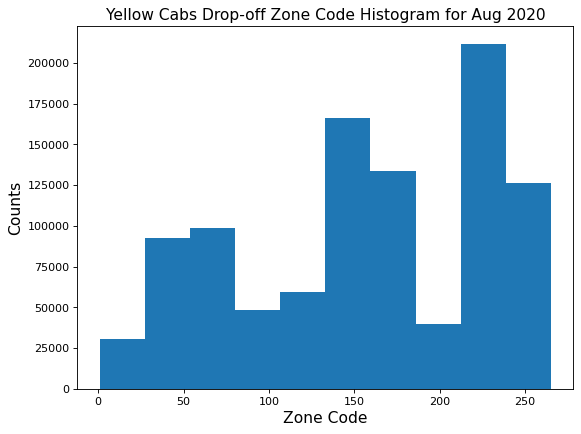

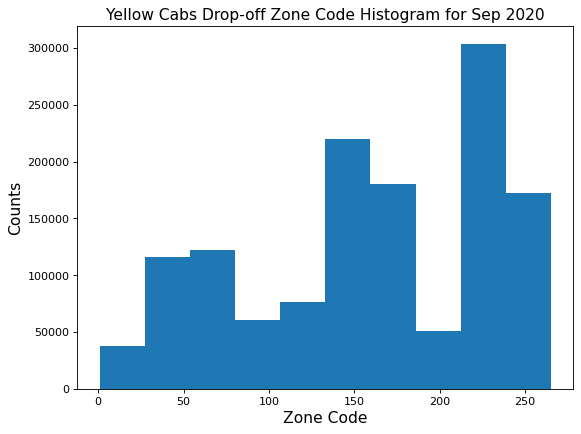

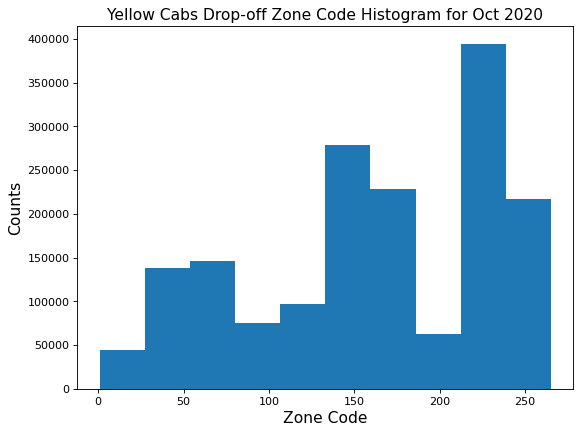

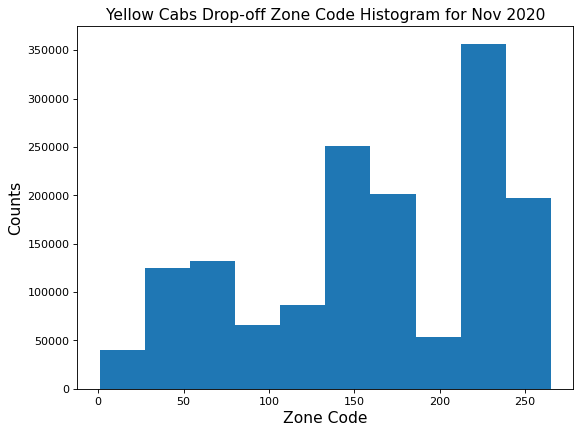

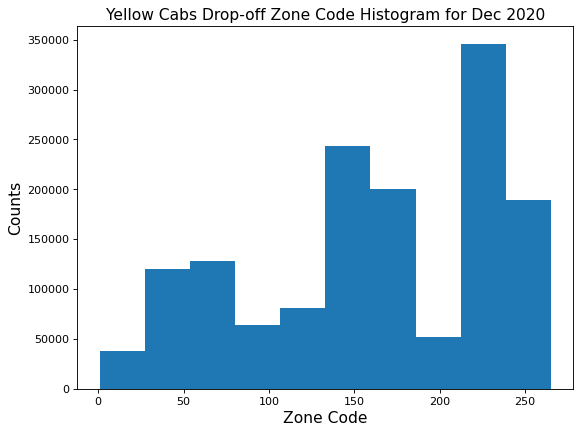

In [ ]:
for i in range(len(yellow2020_clean)):
  figure(figsize=(8, 6), dpi=80)
  plt.hist(yellow2020_clean[i]['DOLocationID'])
  plt.title(f"Yellow Cabs Drop-off Zone Code Histogram for {months_[i]} 2020", fontsize=14)
  plt.xlabel("Zone Code", fontsize=14)
  plt.ylabel("Counts", fontsize=14)
  plt.show()